# <a id='toc1_'></a>[**Assignment 2: Supply Chain Optimization**](#toc0_)

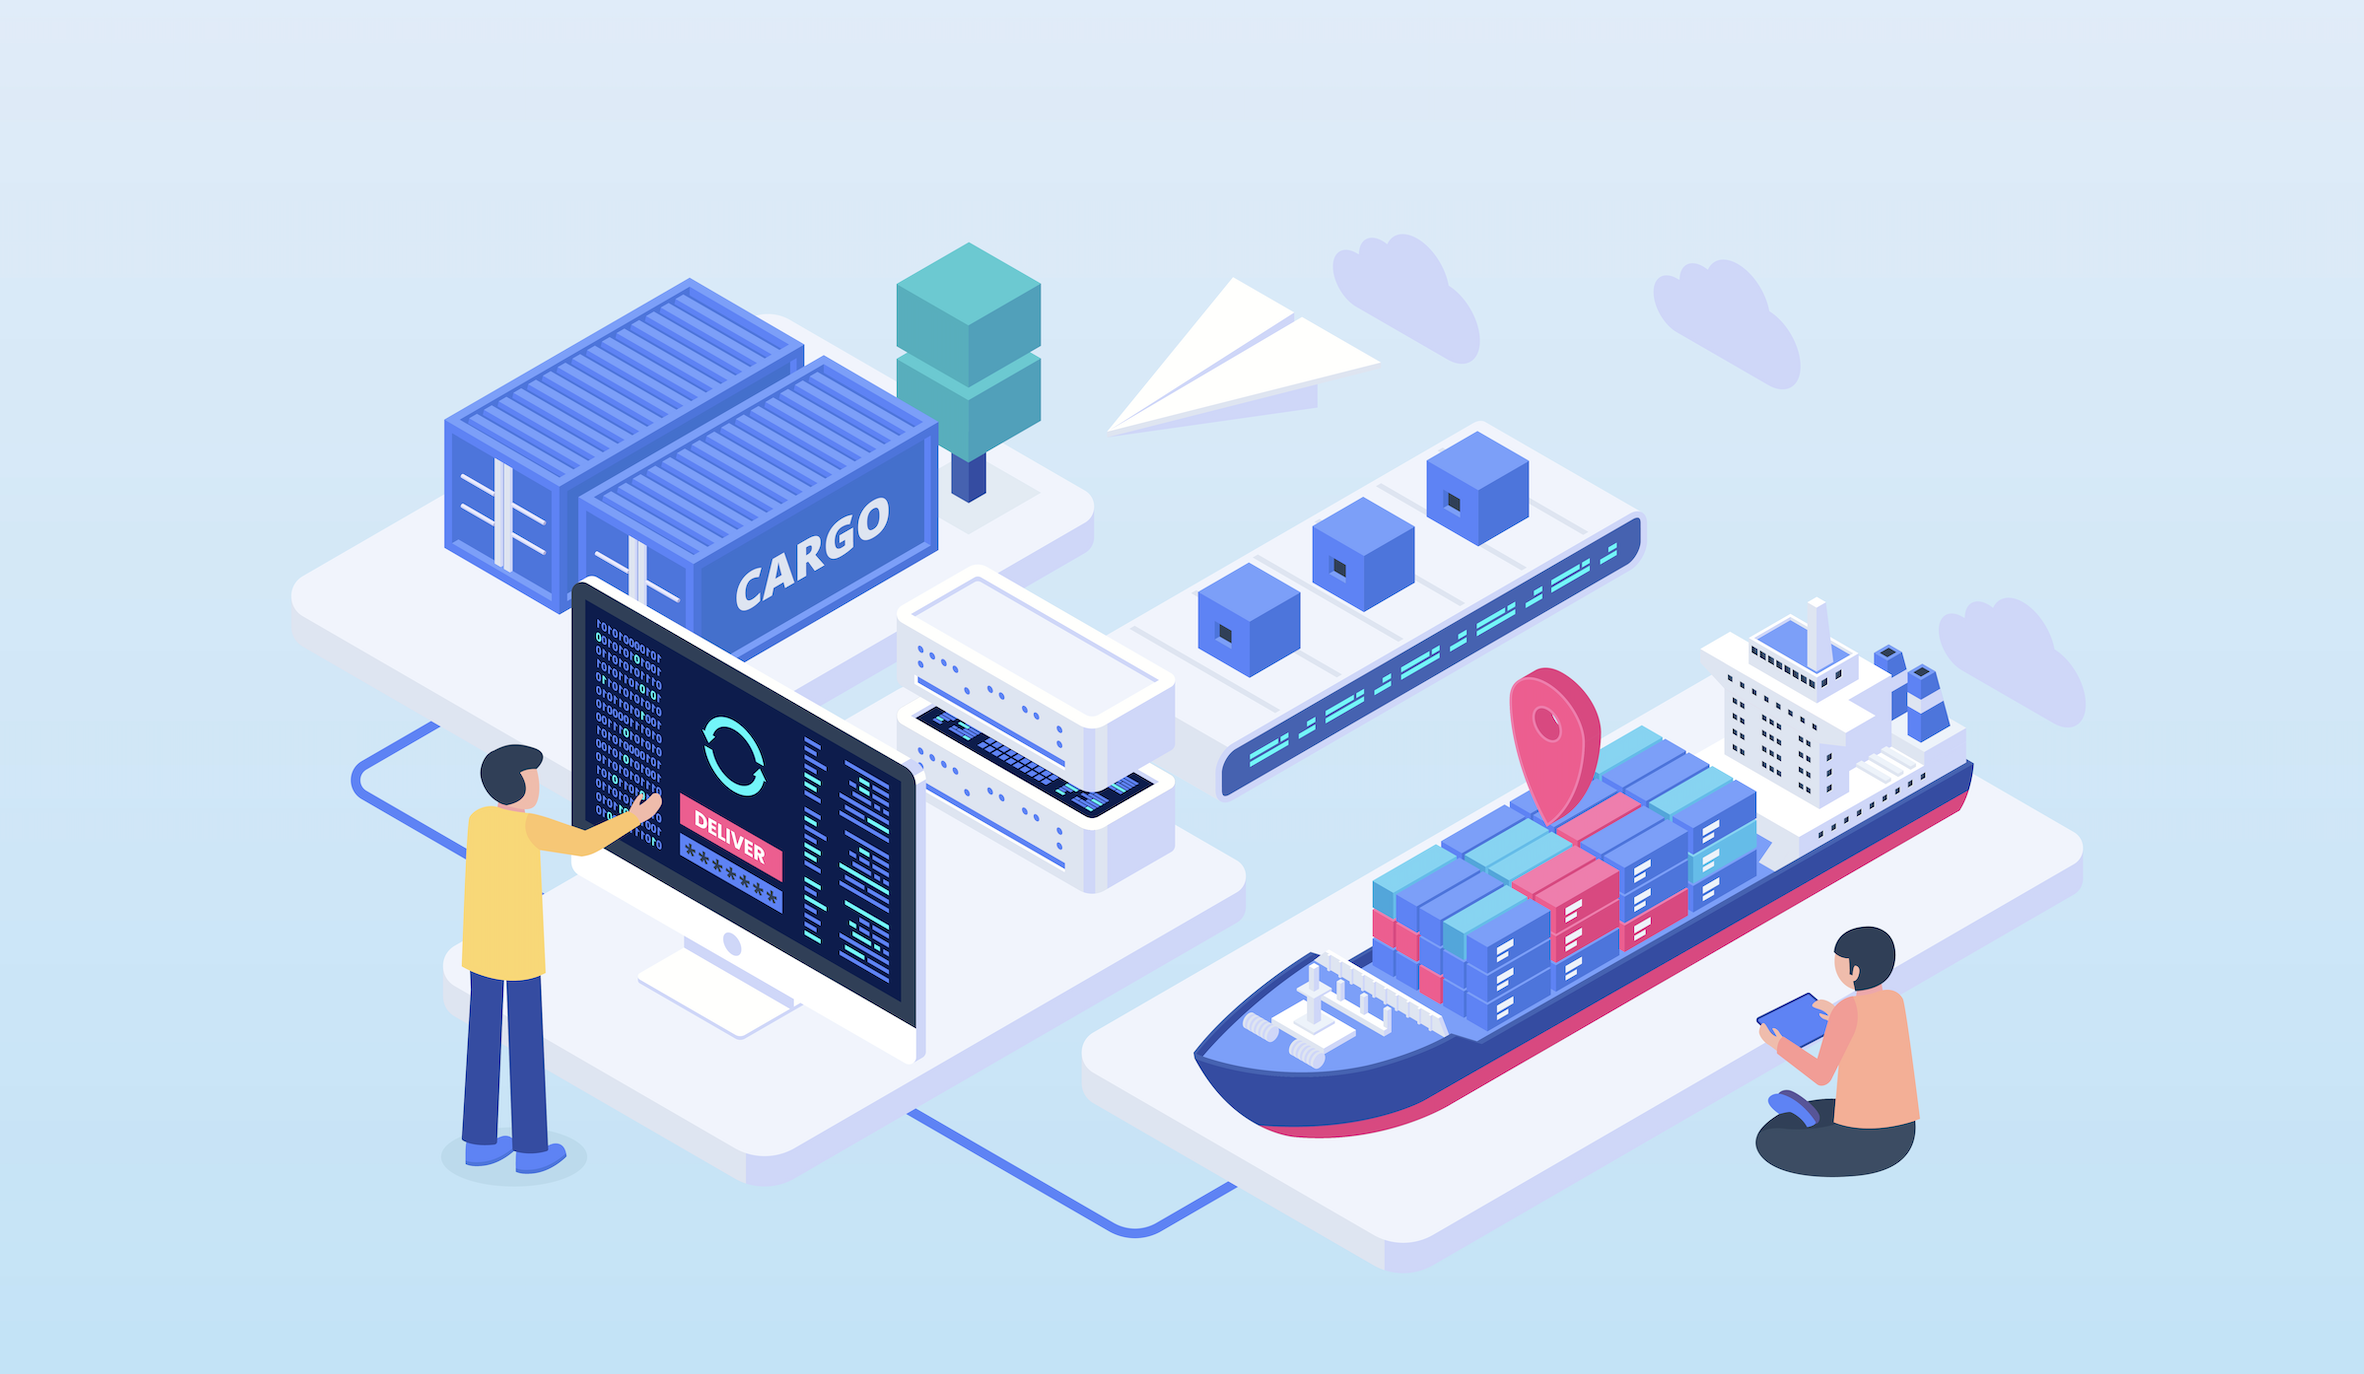

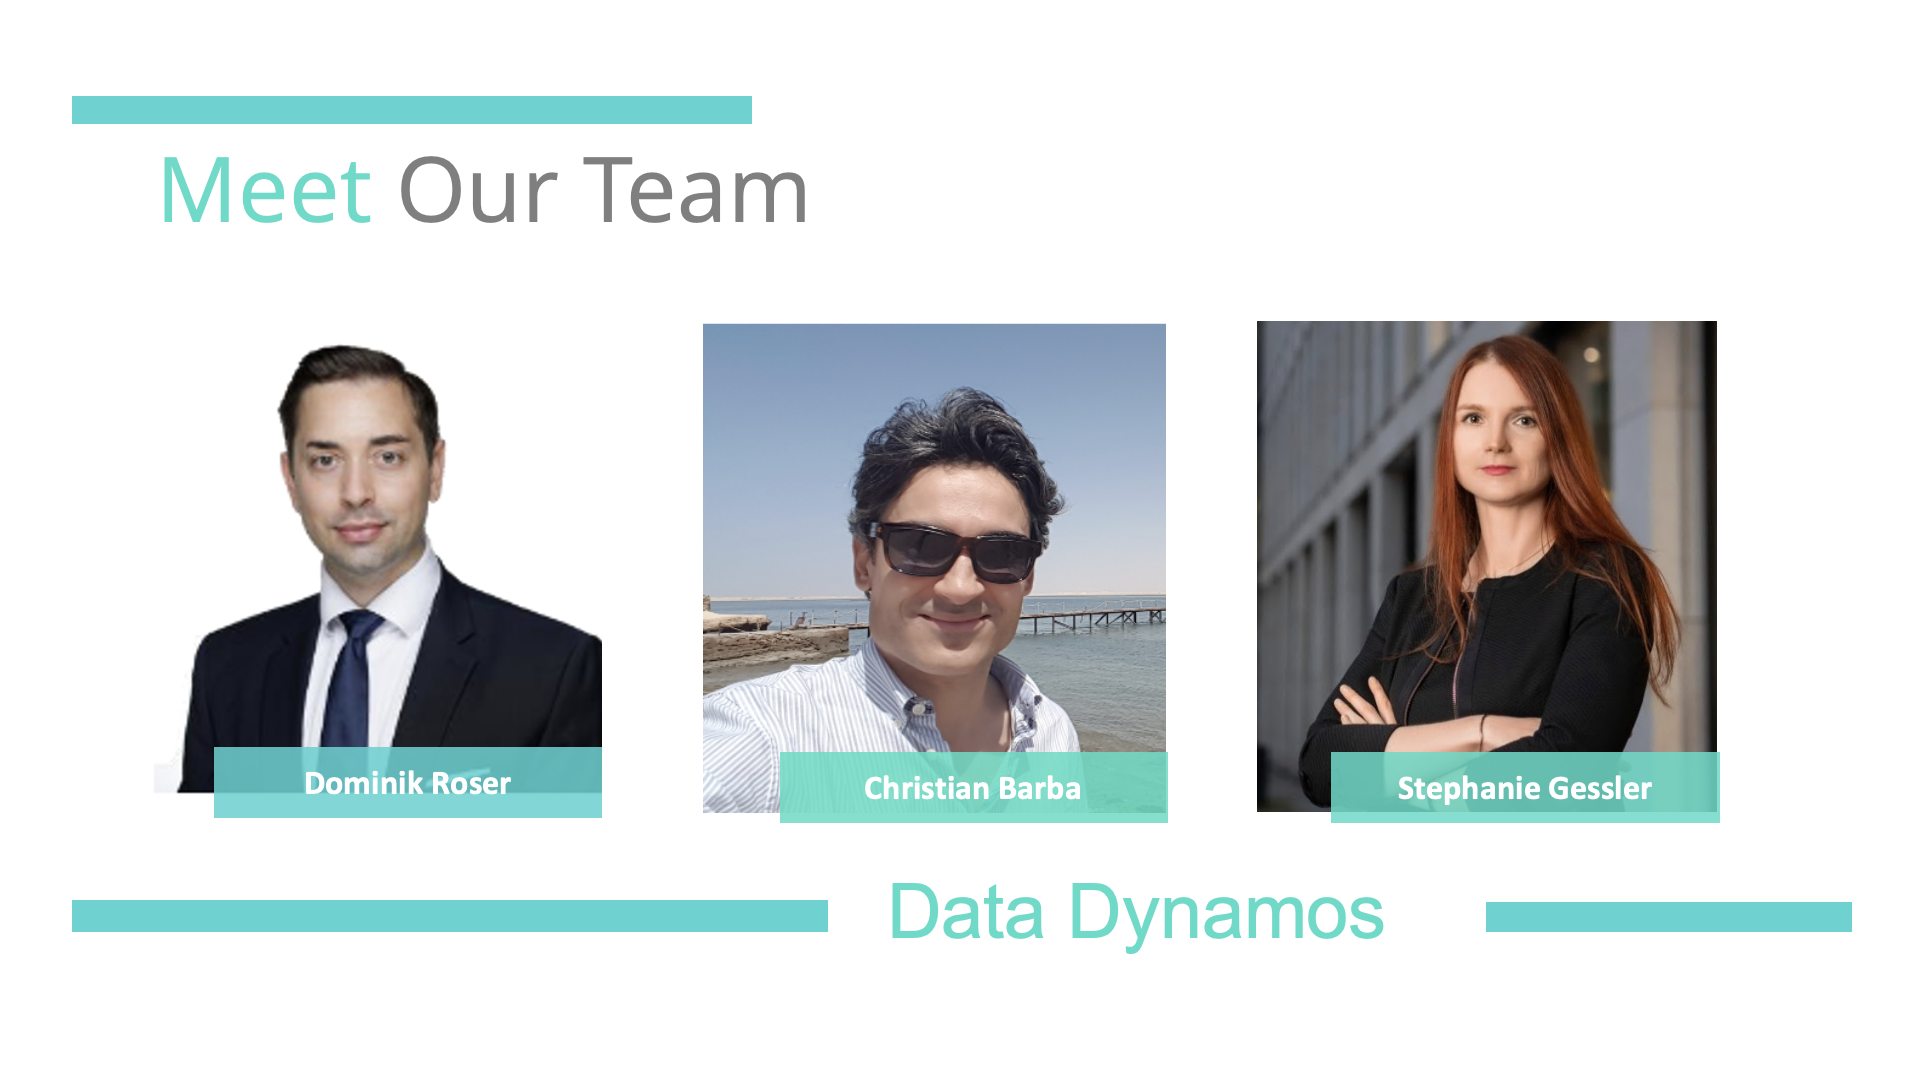


<H1 size =10><center>IE Reinforement Learning 2023 </center></H1>
<HR></HR>
<H2 size =7><center> Constrained Optimization </center></H2>

**Table of contents**<a id='toc0_'></a>    
- [**Assignment 2: Supply Chain Optimization**](#toc1_)    
- [0. Libraries](#toc2_)    
- [1. Supply Chain Optimization for Diabetes Care Products](#toc3_)    
- [2. Diabetes Care Products Datasets](#toc4_)    
- [3. Forecasting](#toc5_)    
  - [3.1 Forecasting ARIMA](#toc5_1_)    
    - [3.1.1 Autocorrelation](#toc5_1_1_)    
    - [3.1.2 MAPE and Forecast from ARIMA](#toc5_1_2_)    
  - [3.2 LSTM](#toc5_2_)    
- [4.Capacity](#toc6_)    
  - [4.1 Capacity by Product](#toc6_1_)    
  - [4.2. Cost by Product Types](#toc6_2_)    
  - [4.3. Profit each product type by country](#toc6_3_)    
- [5. Optimization](#toc7_)    
  - [5.1.Optimization for meters products](#toc7_1_)    
  - [5.2. Interpretation of the Results](#toc7_2_)    
  - [5.3. Constraints Block](#toc7_3_)    
  - [5.4. Functions](#toc7_4_)    
  - [5.5. SLSQP MODEL 1 (Sequential Least SQuares Programming)- gradient-free optimization methods](#toc7_5_)    
    - [Interpretation of the Results](#toc7_5_1_)    
  - [5.6. Model 2: COBYLA (Constrained Optimization BY Linear Approximation )- gradient-free optimization methods](#toc7_6_)    
  - [5.6.1 Model 2: Comparision SLSQP vs. COBYLA](#toc7_7_)    
  - [5.7. Model 3: Trust Region Constraint](#toc7_8_)    
    - [5.7.1 Comparision SLSQP vs. Trust Region Constraint](#toc7_8_1_)    
  - [5.8. Model 4: Pulp using CBC (Coin-or branch and cut) model](#toc7_9_)    
    - [5.8.1 Comparision SLSQP vs. Pulp](#toc7_9_1_)    
  - [5.9. Model 5: Broyden-Fletcher Goldfarb-Shanno/L-BFGS](#toc7_10_)    
    - [5.9.1 Comparision SLSQP vs. Broyden-Fletcher Goldfarb-Shanno/L-BFGS](#toc7_10_1_)    
  - [5.10 Model 6 Distributed Evolutionary Algorithms in Python (DEAP) - Evolutionary](#toc7_11_)    
    - [5.10.1 Comparision SLSQP vs. DEAP](#toc7_11_1_)    
  - [5.11 Model 7 Pyomo/Linear Programming - GLPK (GNU Linear Programming Kit)](#toc7_12_)    
    - [5.11.1 Comparision SLSQP vs. GLPK](#toc7_12_1_)    
  - [5.12 Model 8 Minxed-Integer Programming: CBC (COIN-OR Brand and Cut)](#toc7_13_)    
    - [5.12.1 Comparision SLSQP vs. CBC](#toc7_13_1_)    
  - [5.13 Model : APOPT (Advanced Process Optimization/ Others- mixed integer nonlinear programming (MINLP)](#toc7_14_)    
- [6. Comparision Optimization](#toc8_)    
- [7. Recommendation](#toc9_)    
- [8. Limitations and Complexities in Supply Chain Optimization for Diabetes care](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[0. Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error  # Add this import at the beginning of your code


In [ ]:
!pip install pulp
!pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 65.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00


# <a id='toc3_'></a>[1. Supply Chain Optimization for Diabetes Care Products](#toc0_)


As a supply chain manager, our primary responsibility is managing the production, forecast, and inventory levels of diabetes care products for the Asia-Pacific (APAC) region. We manufacture and distribute a variety of products, including glucose testing strips, meters, and ancillary supplies. Each product variant caters to a specific country within APAC due to language localization requirements. Our ultimate goal is to🎯 **optimize operations** and 💰 **maximize profits**, while ensuring the needs of diverse markets are met.

Here are the key tasks we undertake:

*  🏭 __Production Management__: Our portfolio consists of glucose testing strips, meters, and ancillaries, each produced with distinct language requirements for various countries in APAC. We operate under certain production constraints, with both variable and fixed production costs to consider.

*  📈 __Demand Management__: Over a period of 3 years, we must meet the fluctuating demand for these diabetes care products. It's essential to align production with demand to prevent overproduction or shortages.

* 🔮  __Forecast Management__: We employ forecasting models to predict future demand for each product type and for each country. This forecast aids in shaping our production strategy and ensuring we are prepared for market changes.

*  💹__Profit Optimization__: We strive to maximize overall profits while navigating the various aspects of our supply chain. Profit per product is calculated as the selling price minus variable production costs, fixed costs, and shipping costs.

*  ⏳ __Time Dimension__: All these tasks are conducted within a dynamic 3-year timeframe. As demand, costs, and other factors evolve, our strategies must adapt accordingly.

Our Python notebook uses data analysis, time series forecasting (ARIMA), and optimization techniques (SciPy) to manage these aspects. The primary points we consider are:

*  💼 __Capacity__: Total production must not exceed the manufacturing capacity.

*  🛒 __Demand__: Production levels should align with the forecasted demand for each product type in each country.

*  📊 __Forecast__: An ARIMA model is used to forecast the demand for the next 36 months. Regular updates with the latest data ensure our forecast remains accurate and useful. At the same time we are running an LSTM model to compare results

*  🚀 __Profits__: The objective function is to maximize overall profit, considering selling price, variable production costs, fixed costs, and shipping costs.

*   🕐 __Time Dimension__: We run the model each month over a 3-year period, allowing us to respond to changing demand, forecasts, and costs over time.




</div>

# <a id='toc4_'></a>[2. Diabetes Care Products Datasets](#toc0_)

In this context, we are delving into a real-life case study involving a diabetes care manufacturer. Our focus will be specifically on the Asia-Pacific (APAC) region. This manufacturer produces a range of diabetes care products:
*   __glucose testing strips__
*   __meters__
*   __ancillary supplies__


**Domain Background**
Diabetes patients needs to constantly check their blood sugar level to initiate a counter action in case it is to high or low. The testing strip is used to take a small blood sample normally from the finger. The strip is then introduced to the meter which gives the numeric value of the blood sugar and depending on the model also some recommendation what to do next. Anciallary supplies are used in additon



In [ ]:
#Show all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#Readin in Colab, needs to upload the file
file_path = '/content/Forecast Summary - APAC.xlsx'

#Read locally
#file_path = '/Users/stephaniegessler/OneDrive - IE Students/Reinforcement Learning/Assignment 2/Data/Forecast Summary - APAC.xlsx'

In [ ]:
# Read the Excel file, specifying the sheet name and the range of rows to read
df = pd.read_excel(file_path, sheet_name='Order')


# Convert all column names to string
df.columns = df.columns.astype(str)

# Find the column indices for "Order History" (case insensitive)
order_history_cols = df.columns[df.columns.str.lower().str.contains('order history')]

if not order_history_cols.empty:
    # Filter the DataFrame to include only columns up to January 2021
    df = df.iloc[:, :df.columns.get_loc(order_history_cols[-1]) + 31]

    # Filter out rows that do not contain the 'Order History' string in the specified columns
    df = df[df[order_history_cols].apply(lambda row: row.str.contains('Order History', case=False)).any(axis=1)]

    # Remove unnecessary columns
    df = df.drop(columns=order_history_cols)

    # Display the filtereOHd DataFrame
    df
else:
    print("No 'Order History' columns found")

For simplicity we remove Promo Items as these are materials in another production site and Re-exporting market

In [ ]:
#remove Promo items in Product Type column
df = df[df['Product Type'] != 'Promo Items']
# remove Re-exporting market in Sub Cluster column
df = df[df['Sub Cluster'] != 'Re-exporting market']
df

Sub Cluster Product Type   Jul18   Aug18   Sep18   Oct18   Nov18  \
0  APAC Distributor  Ancillaries   34605   42043   35021   33297   39241   
1  APAC Distributor       Meters   17125   21223   19681   17575   29903   
2  APAC Distributor       Strips  142970  195008  254386  232419  334656   
3             China  Ancillaries     140    7529    4430    1291     200   
4             China       Meters   13418   17078   41123   34210   59642   
5             China       Strips  223702  317496  387691  534272  731908   
6             India  Ancillaries   38089   21203   33590   27407   70732   
7             India       Meters   16937   28100   60607   37026   51756   
9             India       Strips   44423   34808   42753   48919   84940   

    Dec18   Jan19   Feb19   Mar19   Apr19   May19   Jun19   Jul19   Aug19  \
0   50713   24882   34910   42171   30654   24254   48926   44345   52192   
1   29048   10004   20766   27664   22632   20000   30275   22807   29274   
2  242971   87266  155720  239618  225424  204504  333387  190264  233667   
3     177    7936      10    8162      64    1700    5622     862      57   
4   18647   51929    3259   38915   29872   40785   29561   12734   26119   
5  272631  467447  157788  469631  242528  588310  336215  199294  358619   
6   20373   35120   26145   27298   23745   29312   34472   25211   24529   
7   23253   49783   25878   52309   16409   32397   41748   22243   30228   
9   53758  110222   79390  116183   71480   92442  113543   77369  100790   

    Sep19   Oct19   Nov19   Dec19   Jan20   Feb20   Mar20   Apr20   May20  \
0   41650   34972   97117   24417   11636    2048   10188   11696   16740   
1   37647   23547   28996   23876   17826   16603   21299     548    3640   
2  394213  232799  385542  146351  100513  125793  259791  143058  189703   
3    5777     930    2328    9654  440278  210216  319968  416573  502115   
4   40109   17340   16331    8461   10300    8930   19610   29890   39740   
5  476211  248456  331000  306024  273168  132036  240522  297501  387788   
6   29570   18087   29022   53439   23739   22138   42527   12113   27561   
7   35366   36967   50088   68911   21677   26137   26201    4870   26597   
9  143684   91090  139443  233448  305466  376738  345529  178695  357652   

    Jun20   Jul20   Aug20   Sep20   Oct20   Nov20   Dec20  
0   19812  122501    9838   41951   56687   62980  103982  
1   56777   20538    8190   34181    4006   39967    9063  
2  352771  327201  248803  412630  449949  363700  305511  
3  590421  423560  444953  666760  349646  654505  559017  
4   36493   13189   16824   32146   10274    8432    6880  
5  382266  308071  293435  451414  271394  482836  430977  
6   29391   20762   16038   23561   33661   23223   22352  
7   32951   27385   45122   58509   53340   35759   20996  
9  435071  379844  360622  415224  346405  302287  292043

In [ ]:
# Melt the dataframe from wide to long format
df_melt = df.melt(id_vars=['Sub Cluster', 'Product Type'], var_name='Date', value_name='Actual Demand')
df_melt['Actual Demand'] = pd.to_numeric(df_melt['Actual Demand'])


# Convert 'Date' column to datetime format
df_melt['Date'] = pd.to_datetime(df_melt['Date'], format='%b%y')  # assuming the date format is like 'Jul18'

# Now df_melt should be in the desired format
df_melt

Sub Cluster Product Type       Date  Actual Demand
0    APAC Distributor  Ancillaries 2018-07-01          34605
1    APAC Distributor       Meters 2018-07-01          17125
2    APAC Distributor       Strips 2018-07-01         142970
3               China  Ancillaries 2018-07-01            140
4               China       Meters 2018-07-01          13418
..                ...          ...        ...            ...
265             China       Meters 2020-12-01           6880
266             China       Strips 2020-12-01         430977
267             India  Ancillaries 2020-12-01          22352
268             India       Meters 2020-12-01          20996
269             India       Strips 2020-12-01         292043

[270 rows x 4 columns]

In [ ]:
df_demand = df_melt

In [ ]:
# List of unique product types
product_types = df_demand['Product Type'].unique()

# List of unique sub clusters
sub_clusters = df_demand['Sub Cluster'].unique()

# Create a color dictionary for sub clusters
color_dict = dict(zip(sub_clusters, ['red', 'blue', 'green'])) # Add more colors if you have more sub clusters

# Create subplots: one for each product type
fig = make_subplots(rows=len(product_types), cols=1, subplot_titles=product_types)

for i, product_type in enumerate(product_types, start=1):
    df_product = df_demand[df_demand['Product Type'] == product_type]
    for sub_cluster in sub_clusters:
        df_subcluster = df_product[df_product['Sub Cluster'] == sub_cluster]
        fig.add_trace(
            go.Scatter(
                x=df_subcluster['Date'],
                y=df_subcluster['Actual Demand'],
                mode='lines',
                name=sub_cluster,
                line=dict(color=color_dict[sub_cluster]),
                #showlegend=(i==1) # Show legend only in the first subplot to avoid repetition
            ),
            row=i, col=1
        )

# Update layout
fig.update_layout(height=600, width=900, title_text="Time Series:  Historical Demand Product by Type and Country", title_x=0.5)
fig.show()


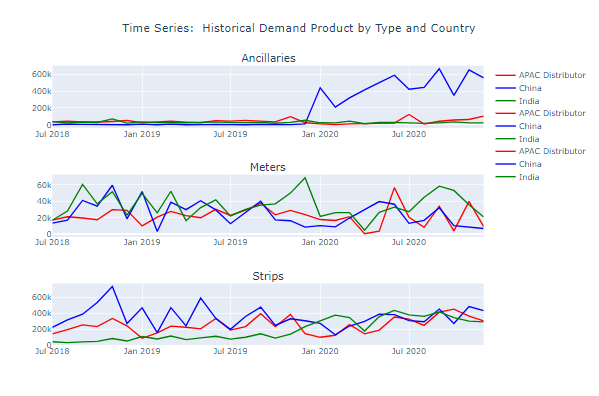

In the underlying data we see that especially Anicallaries in China had an increasing demand in 2020. Hisotrical explanation is the beginning of the Covid Panddemic.

For Meters we can see that all three regions are quite close to each other in terms of demand with a few spikes that look more seasons.

For Strip China and APAC in general had a higher demand up until end of 2019. With beginning of the Covid Crisis also India had more demand. Which will make the accuarcy harder to forecast

# <a id='toc5_'></a>[3. Forecasting](#toc0_)

## <a id='toc5_1_'></a>[3.1 Forecasting ARIMA](#toc0_)

Forecast using ADF test - testing for stationary whether your time series has a unit root or not, i.e., whether it is stationary which means a sort of trend, or is hard to be predicted. The null hypothesis of the ADF test is that the time series has a unit root (and is non-stationary). If the test statistic is less than the critical value, then you can reject the null hypothesis and assume that the time series is stationary.

*   __APAC Distributor - Ancillaries, Meters, and Strips__: The p-values are less than 0.05, so we can reject the hypothesis that these series are non-stationary. That means these series are <span style='color:#098e83'> __stationary__</span>.

*   __China - Ancillaries__: The p-value is greater than 0.05, so we can't reject the hypothesis that the series is non-stationary. That means the series is  __non-stationary__. Here we had a frozen period due to change of supplier and manufacturing side.

*   __China - Meters and Strips__: The p-values are less than 0.05, so we can reject the hypothesis that these series are non-stationary. That means these series are <span style='color:#098e83'> __stationary__</span>.

*   __India - Ancillaries,Strips__: The p-value is greater than 0.05, so we can't reject the hypothesis that the series is non-stationary. That means the series is  __non-stationary__.

*   __India - Meters__: The p-value is less than 0.05, so we can reject the hypothesis that the series is non-stationary. That means this series is  <span style='color:#098e83'> __stationary__</span>.


In [ ]:
# get unique combinations of 'Sub Cluster' and 'Product Type'
clusters = df['Sub Cluster'].unique()
product_types = df['Product Type'].unique()

for cluster in clusters:
    for product_type in product_types:
        subset = df[(df['Sub Cluster'] == cluster) & (df['Product Type'] == product_type)]
        subset = subset.drop(['Sub Cluster', 'Product Type'], axis=1)

        # convert DataFrame row to series (there should be only one row per subset)
        series = subset.iloc[0]

        # apply Dickey-Fuller test
        result = adfuller(series)
        print(f'Dickey-Fuller test for {cluster} - {product_type}')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])

Dickey-Fuller test for APAC Distributor - Ancillaries
ADF Statistic: -3.399142
p-value: 0.010988
Dickey-Fuller test for APAC Distributor - Meters
ADF Statistic: -6.798046
p-value: 0.000000
Dickey-Fuller test for APAC Distributor - Strips
ADF Statistic: -3.670085
p-value: 0.004554
Dickey-Fuller test for China - Ancillaries
ADF Statistic: 0.294667
p-value: 0.977098
Dickey-Fuller test for China - Meters
ADF Statistic: -4.668164
p-value: 0.000097
Dickey-Fuller test for China - Strips
ADF Statistic: -5.443052
p-value: 0.000003
Dickey-Fuller test for India - Ancillaries
ADF Statistic: -2.735998
p-value: 0.068013
Dickey-Fuller test for India - Meters
ADF Statistic: -3.808604
p-value: 0.002821
Dickey-Fuller test for India - Strips
ADF Statistic: -1.410015
p-value: 0.577466


Indian Ancilliaries and stips as well the Ancilliaries of China are not stationary. Since these items seems to be impacted by Covid. We will try to remove some historical data and test if the items become more stationary.  For India it becomes stationary in the unit root when you only look at January 2020, for China as of May 2020.

In [ ]:
# Get unique subclusters
subclusters = df_demand['Sub Cluster'].unique()

for subcluster in subclusters:
    subset = df_demand[(df_demand['Sub Cluster'] == subcluster) & (df_demand['Product Type'] == 'Ancillaries') & (df_demand['Date'] >= '2020-05-01')]

    # Apply Dickey-Fuller test
    result = adfuller(subset['Actual Demand'])
    print(f'Dickey-Fuller test for {subcluster} - Ancillaries (after January 2020)')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Dickey-Fuller test for APAC Distributor - Ancillaries (after January 2020)
ADF Statistic: -2.886393
p-value: 0.046953
Dickey-Fuller test for China - Ancillaries (after January 2020)
ADF Statistic: -3.468066
p-value: 0.008846
Dickey-Fuller test for India - Ancillaries (after January 2020)
ADF Statistic: -34.746534
p-value: 0.000000


### <a id='toc5_1_1_'></a>[3.1.1 Autocorrelation](#toc0_)

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to figure out the order of Auto-Regressive, Moving Average Models and ARMA models.
Examining the graphics for autocorrelation helps us identify any significant relationships between a time series and its lagged values, allowing us to detect patterns and dependencies that can inform forecasting and modeling decisions.

ACF measures the correlation between a time series and lagged values. If the ACF plot shows slow decay, it typically indicates that the series can be represented well by a MA (Moving Average) model.

PACF: PACF measures the correlation between a time series and its lagged values while controlling for the values at all shorter lags. If the PACF plot shows a sharp cut-off and/or a gradual decay, it typically indicates that the series can be represented well by an AR (Autoregressive) model


For each product by country we look at the Autocorrelation and Partical Autocorrelation. It gives us an indication if we have to take lag difference, if there is seasonality etc.

Additionally, you can see a blue area in the ACF and PACF plots. This blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero. Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1

Trend: China Ancillaries, India Strips

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



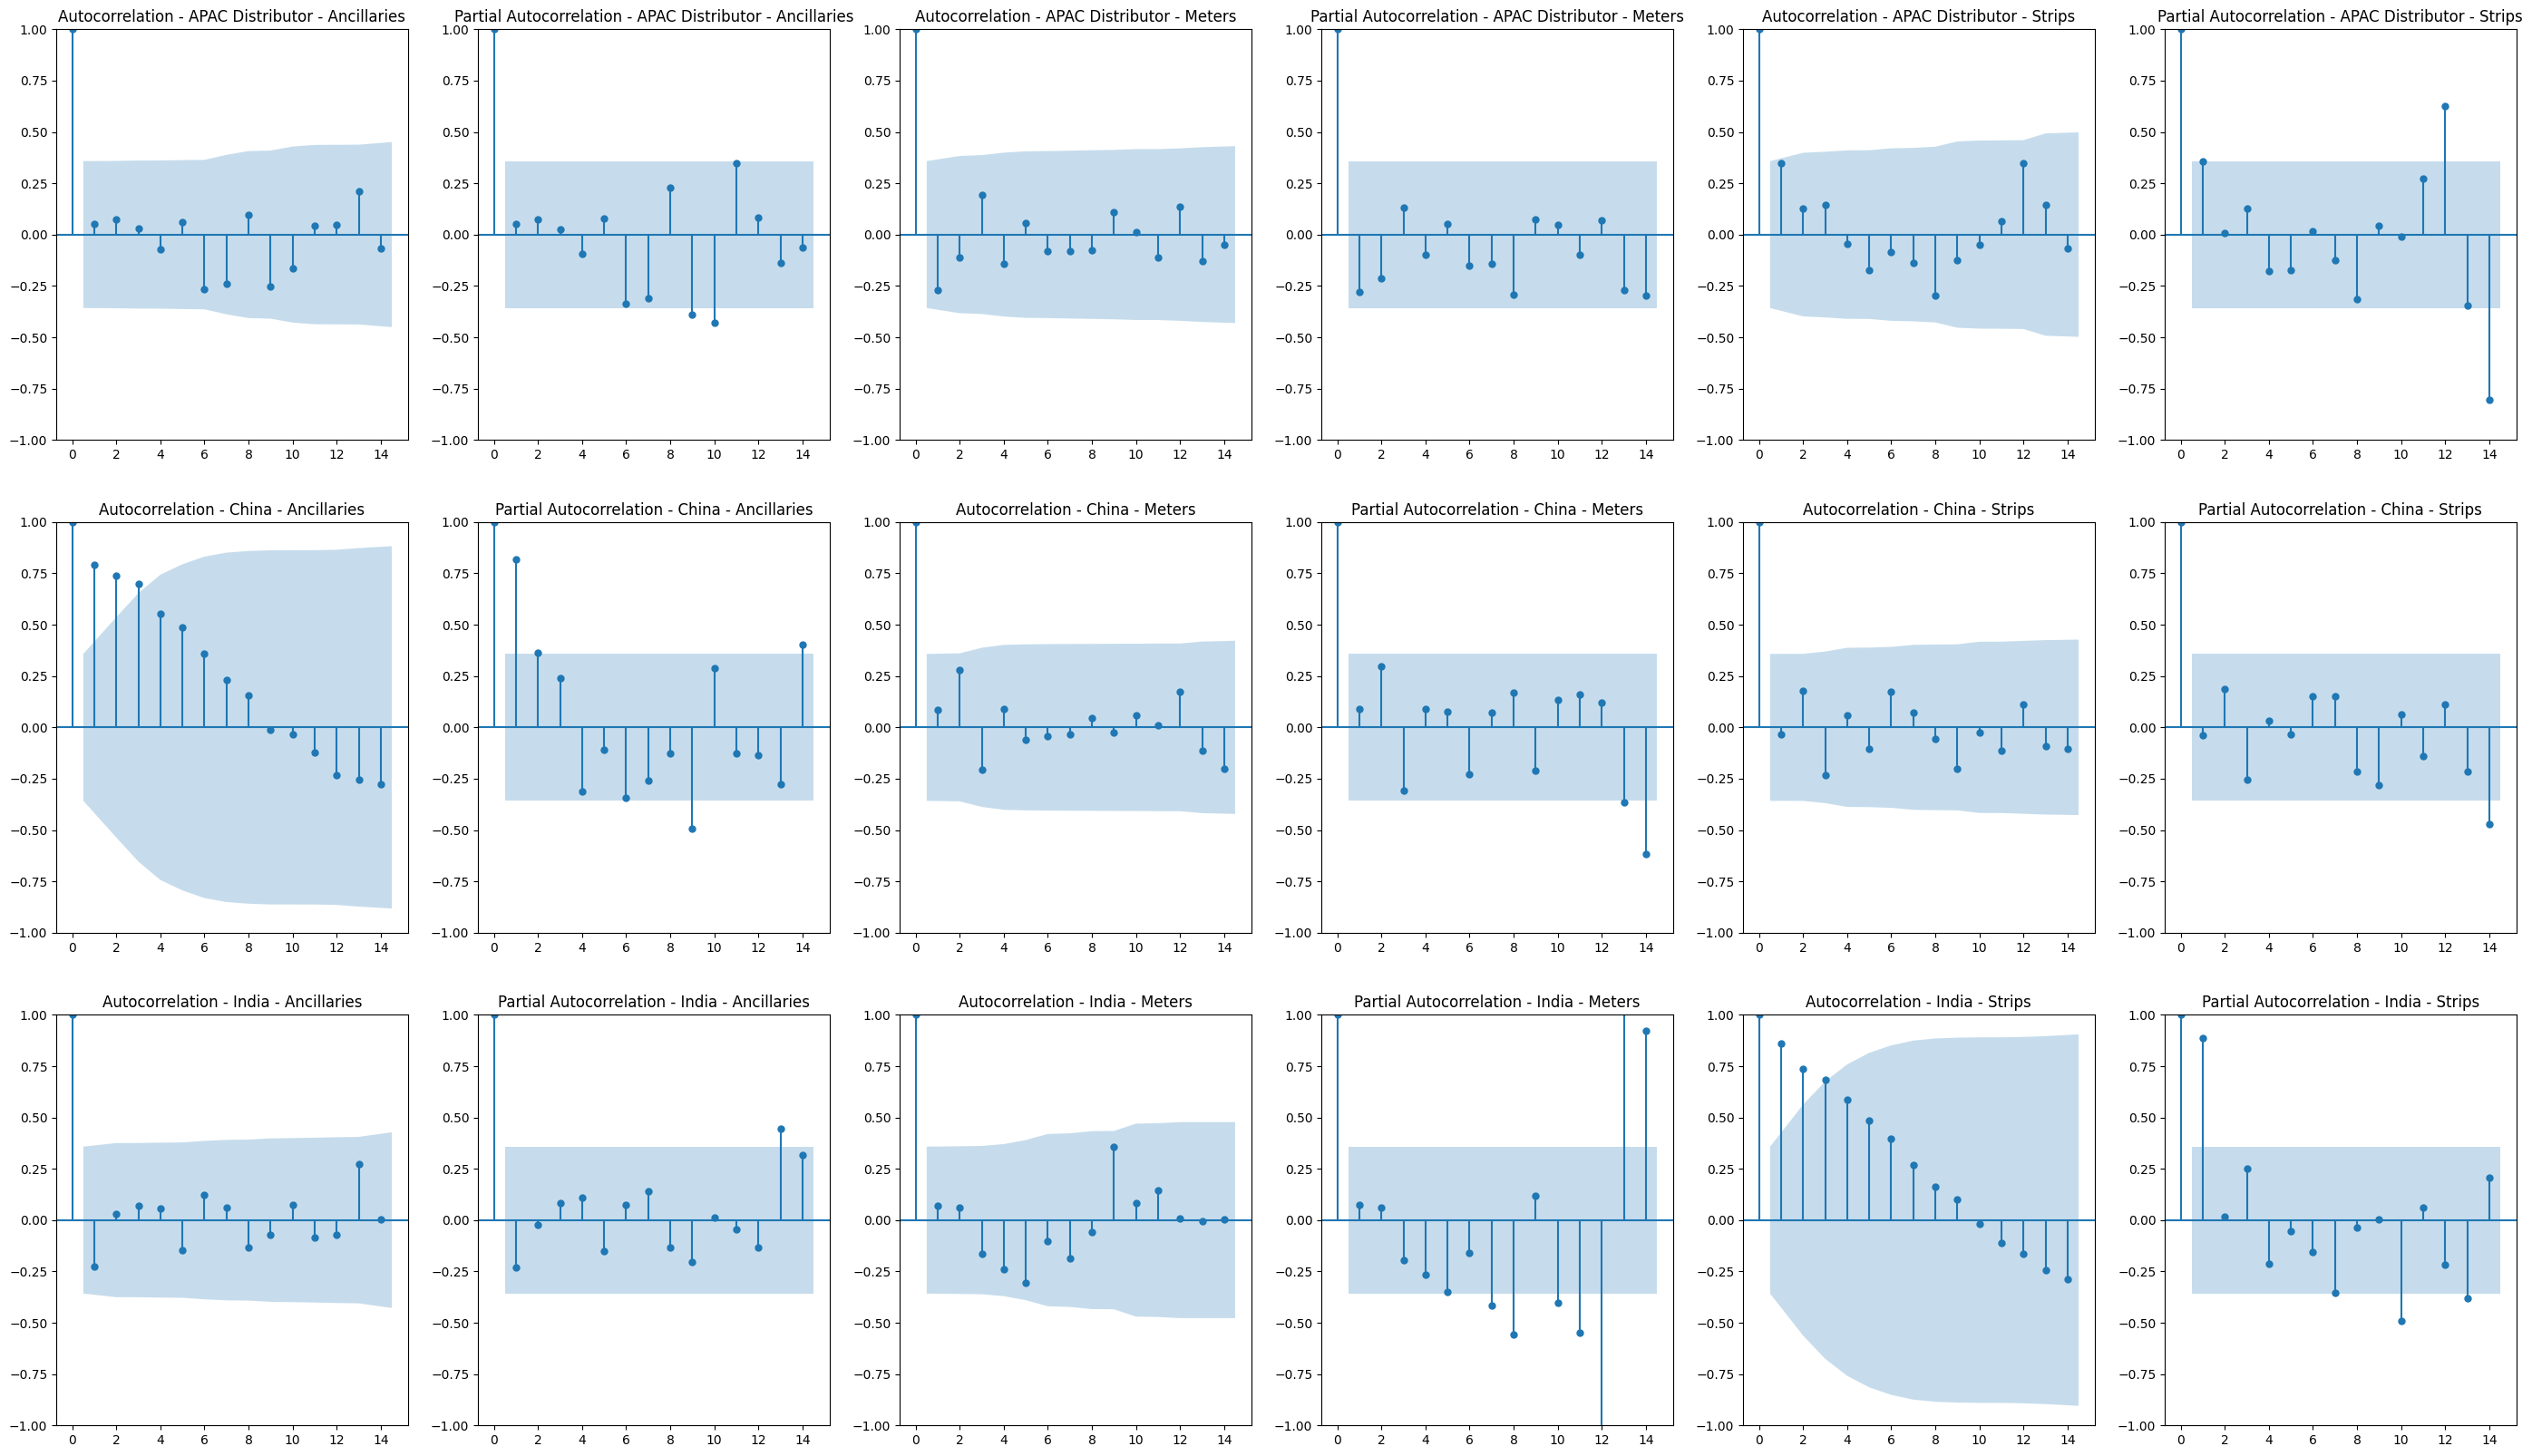

In [ ]:
# Get unique subclusters and product types
product_types = df_demand['Product Type'].unique()

nlags = 14 # Number of lags to include

# Determine the number of rows and columns for the subplot grid
num_rows = len(clusters)
num_cols = len(product_types) * 2  # Multiply by 2 for both autocorrelation and partial autocorrelation

# Create subplots with multiple rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 20), squeeze=False)

for i, subcluster in enumerate(clusters):
    for j, product_type in enumerate(product_types):
        subset = df_demand[(df_demand['Sub Cluster'] == subcluster) & (df_demand['Product Type'] == product_type)]

        # Convert the 'Value' column to a time series
        y = subset['Actual Demand']

        # Plot autocorrelation
        plot_acf(y, lags=nlags, ax=axes[i, 2*j])
        axes[i, 2*j].set_title(f'Autocorrelation - {subcluster} - {product_type}')

        # Plot partial autocorrelation
        plot_pacf(y, lags=nlags, ax=axes[i, 2*j+1])
        axes[i, 2*j+1].set_title(f'Partial Autocorrelation - {subcluster} - {product_type}')



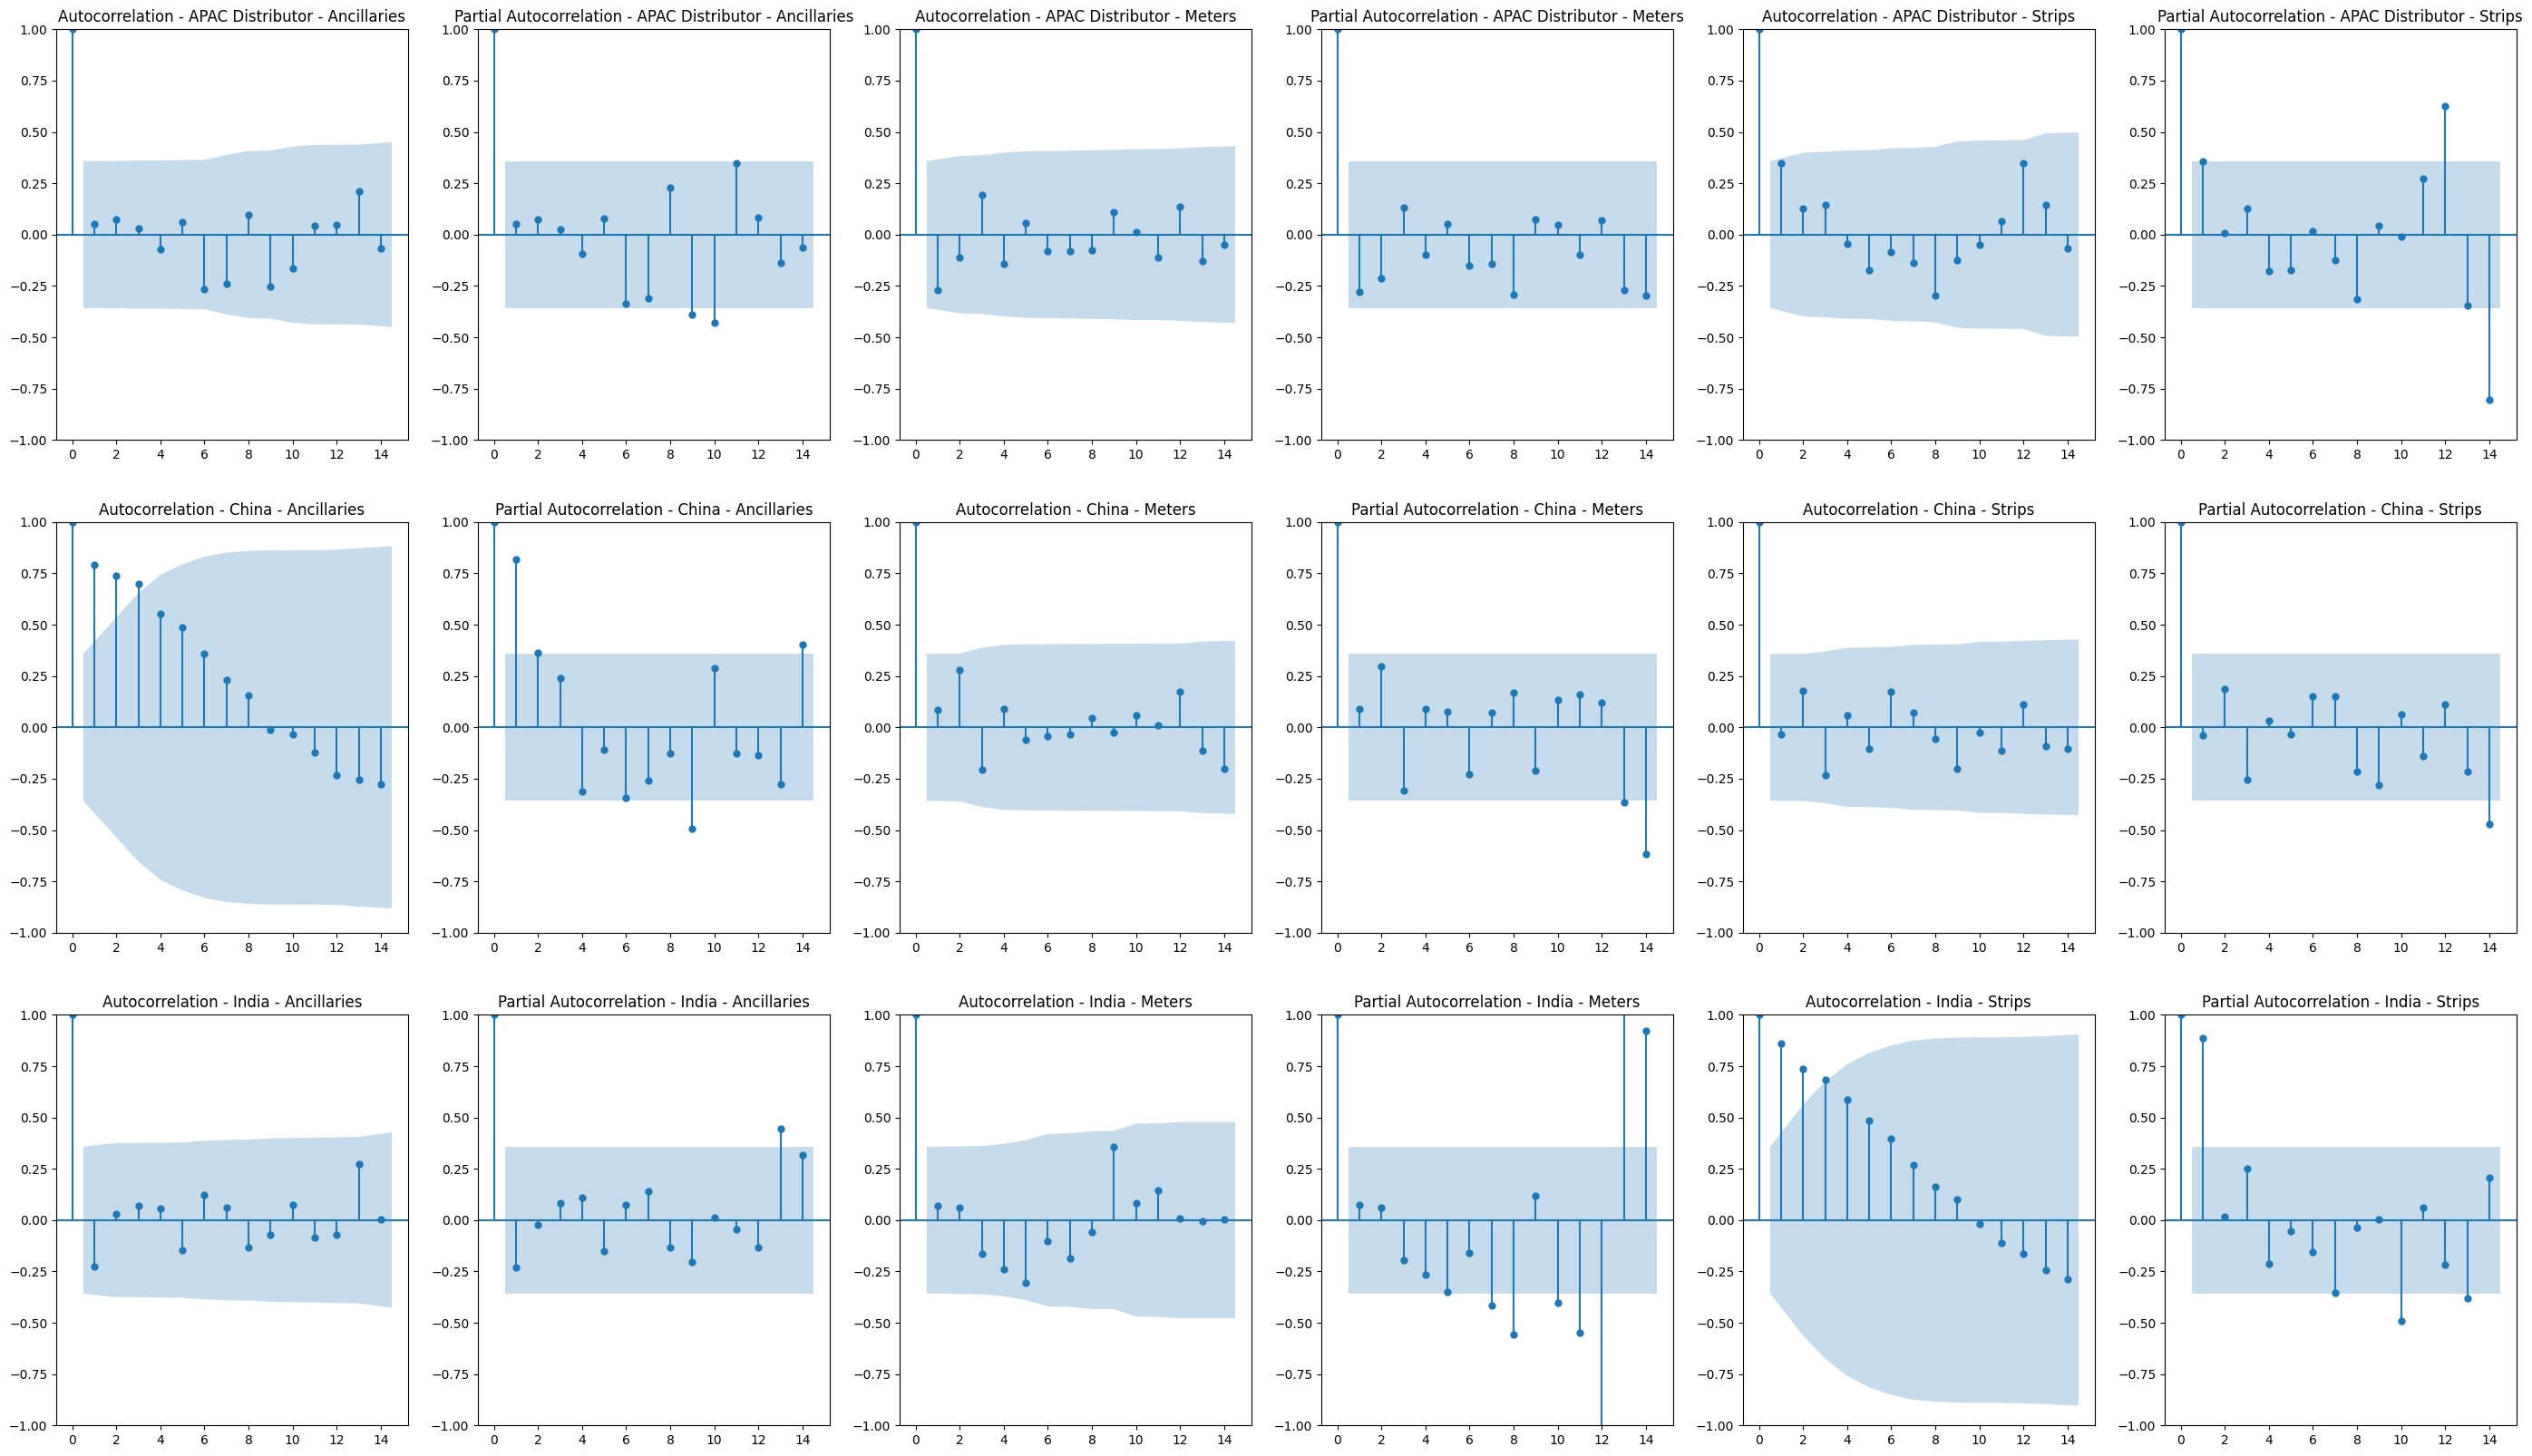

### <a id='toc5_1_2_'></a>[3.1.2 MAPE and Forecast from ARIMA](#toc0_)

For the ones with stationary we propose the following forecasts

Low MAPE / MAE achieved for:

*   APAC Distributor - Strips
*   China - Strip
*   India - Ancillaries
*   India - Meters

High MAPE / MAE

*   APAC Distributor - Ancilliaries
*   APAC Distributor - Meters
*   China - Meters

In [ ]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame(columns=['Sub Cluster', 'Product Type', 'Date', 'Forecasted Demand'])

Below graphs you can see the performance of the different items versus the actuals.

Forecast for APAC Distributor - Ancillaries:


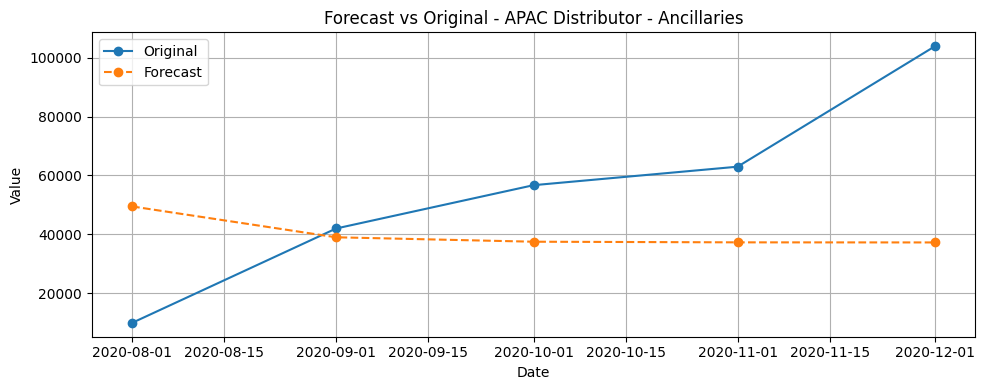

MAPE: 1.0977597581895688
MAE: 30871.99973012087
MSE: 1414061569.6335003

Forecast for APAC Distributor - Meters:


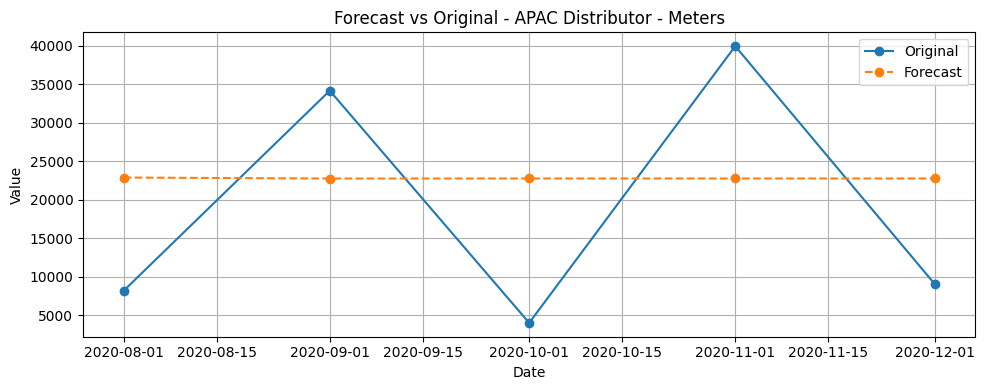

MAPE: 1.7513541277116929
MAE: 15158.592036164588
MSE: 236476424.26590952

Forecast for APAC Distributor - Strips:


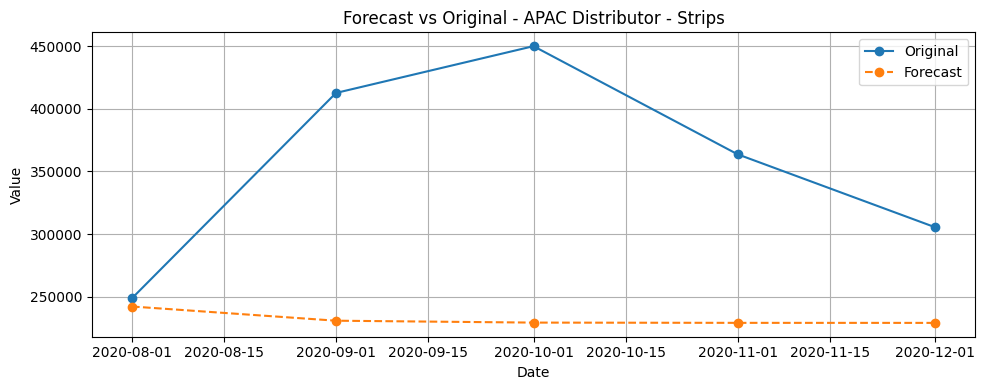

MAPE: 0.31523075372786036
MAE: 123902.29915273988
MSE: 21117013102.739532

Forecast for China - Meters:


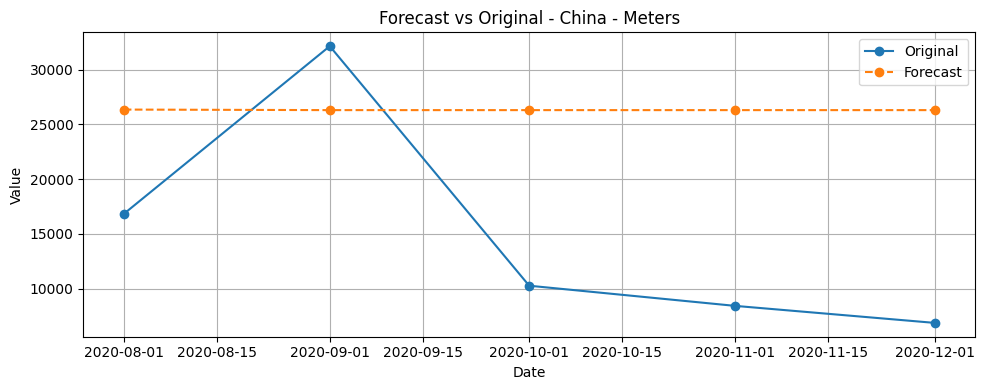

MAPE: 1.4505073815752765
MAE: 13741.579092367198
MSE: 215798299.83274332

Forecast for China - Strips:


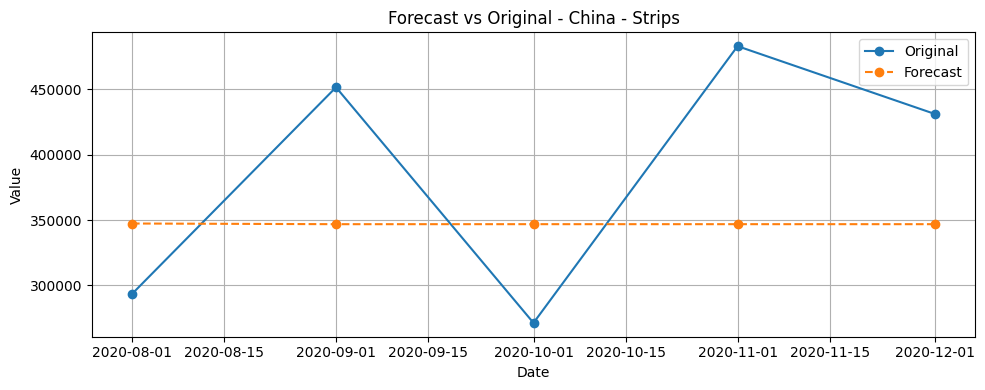

MAPE: 0.23405384105609744
MAE: 90817.58975557543
MSE: 9023245991.531796

Forecast for India - Ancillaries:


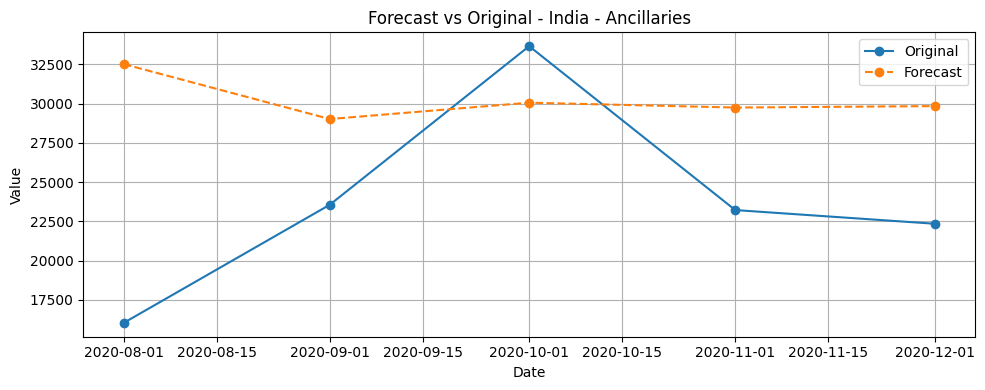

MAPE: 0.3965224625723624
MAE: 7912.254066143041
MSE: 82629321.77764615

Forecast for India - Meters:


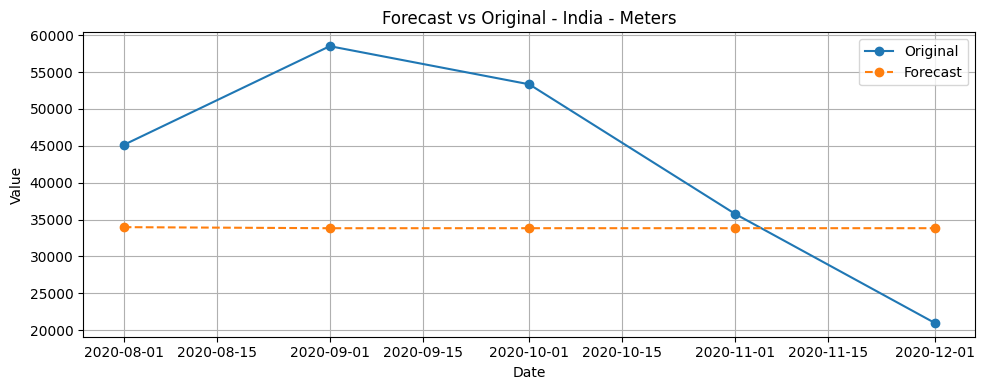

MAPE: 0.3399634246879614
MAE: 14019.250965273211
MSE: 256467695.0470725

        Sub Cluster Product Type      MAPE            MAE           MSE
0  APAC Distributor  Ancillaries  1.097760   30871.999730  1.414062e+09
1  APAC Distributor       Meters  1.751354   15158.592036  2.364764e+08
2  APAC Distributor       Strips  0.315231  123902.299153  2.111701e+10
3             China       Meters  1.450507   13741.579092  2.157983e+08
4             China       Strips  0.234054   90817.589756  9.023246e+09
5             India  Ancillaries  0.396522    7912.254066  8.262932e+07
6             India       Meters  0.339963   14019.250965  2.564677e+08


In [ ]:
from sklearn.metrics import mean_squared_error

# Suppress the value warning
warnings.filterwarnings("ignore")

# Create an empty DataFrame to store forecast metrics
forecast_metrics_df = pd.DataFrame(columns=['Sub Cluster', 'Product Type', 'MAPE', 'MAE', 'MSE'])

# Define the sub-clusters and product types of interest
sub_clusters = ['APAC Distributor', 'China', 'India']
product_types = {'APAC Distributor': ['Ancillaries', 'Meters', 'Strips'],
                 'China': ['Meters', 'Strips'],
                 'India': ['Ancillaries','Meters']}

# Loop over each sub-cluster and product type
for sub_cluster in sub_clusters:
    for product_type in product_types[sub_cluster]:
        print(f"Forecast for {sub_cluster} - {product_type}:")

        # Filter the data for the specific sub-cluster and product type
        subset = df_demand[(df_demand['Sub Cluster'] == sub_cluster) & (df_demand['Product Type'] == product_type)]

        # Sort the data by date in ascending order
        subset = subset.sort_values('Date')

        # Set the 'Date' column as the index
        subset = subset.set_index('Date')

        # Extract the 'Value' column as the time series data
        data = subset['Actual Demand']

        # Split the data into training and test sets
        train_data = data[:-5]
        test_data = data[-5:]

        # Fit the ARIMA model
        order = (1, 0, 0)  # Set the order of the ARIMA model
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()

        # Forecast the next 5 months
        forecast = model_fit.forecast(steps=5)

        # Calculate MAPE for the test set
        mape = mean_absolute_percentage_error(test_data, forecast)

        # Calculate MAE for the test set
        mae = mean_absolute_error(test_data, forecast)

        # Calculate MSE for the test set
        mse = mean_squared_error(test_data, forecast)

        # Append the forecast metrics to the DataFrame
        forecast_metrics_df = forecast_metrics_df.append({
            'Sub Cluster': sub_cluster,
            'Product Type': product_type,
            'MAPE': mape,
            'MAE': mae,
            'MSE': mse
        }, ignore_index=True)

        # Append the forecast to the DataFrame for Code 1
        forecast_dates = forecast.index  # extract dates from forecast
        for f_date, f_value in zip(forecast_dates, forecast.values):
            forecast_df.loc[len(forecast_df)] = [sub_cluster, product_type, f_date, f_value]

        # Plot the forecast and the original values
        plt.figure(figsize=(10, 4))
        plt.plot(test_data.index, test_data.values, label='Original', marker='o')
        plt.plot(forecast.index, forecast.values, label='Forecast', linestyle='--', marker='o')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Forecast vs Original - {sub_cluster} - {product_type}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Output the forecast metrics
        print("MAPE:", mape)
        print("MAE:", mae)
        print("MSE:", mse)
        print()

# Display the forecast metrics DataFrame
print(forecast_metrics_df)


For the nonstationary items we need a different model either a different Arima model or another forecast model

For the  China Ancillaries and India strips  we are going to take the ARIMA(2,2,0) and see if the forecast gets better. All variables are significant for Arima Lag 1 and Arima Lag 2 ( ar.L1, ar.L2). For China we have a lowe MAE and MAPE with China - Ancillaries: 0.19%.  For India Strips is moderate: India - Strips: 0.496%

ACF and PACF for China - Ancillaries:
                               SARIMAX Results                                
Dep. Variable:          Actual Demand   No. Observations:                   30
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -369.359
Date:                Wed, 21 Jun 2023   AIC                            744.719
Time:                        13:18:11   BIC                            748.716
Sample:                    07-01-2018   HQIC                           745.941
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2287      0.147     -8.344      0.000      -1.517      -0.940
ar.L2         -0.7235      0.167     -4.331      0.000      -1.051      -0.396
sigma2      1.

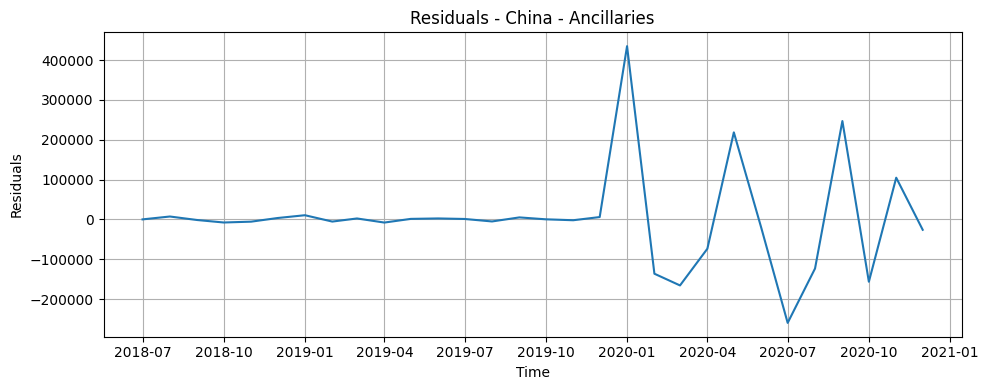

<Figure size 1000x400 with 0 Axes>

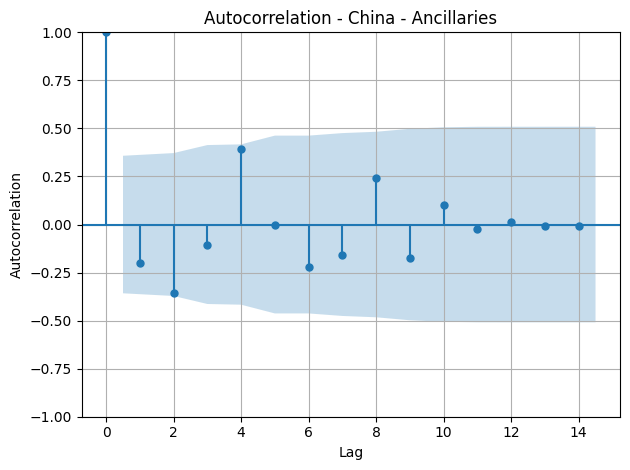

<Figure size 1000x400 with 0 Axes>

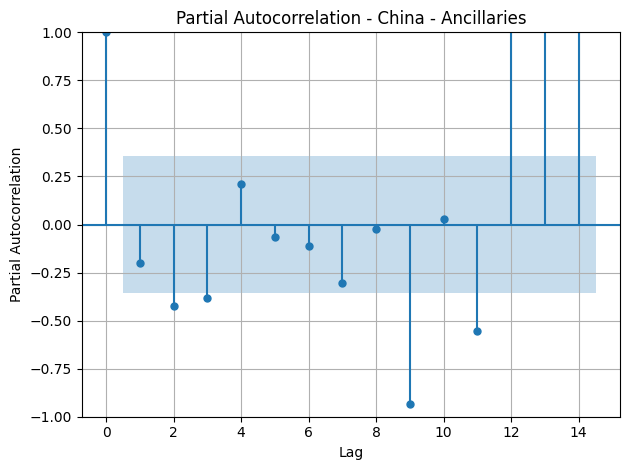

Mean Absolute Error (MAE) for China - Ancillaries: 85041.41768204639
Mean Absolute Percentage Error (MAPE) for China - Ancillaries: 0.19874275666984023%
ACF and PACF for India - Strips:
                               SARIMAX Results                                
Dep. Variable:          Actual Demand   No. Observations:                   30
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -353.636
Date:                Wed, 21 Jun 2023   AIC                            713.273
Time:                        13:18:12   BIC                            717.270
Sample:                    07-01-2018   HQIC                           714.495
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6528   

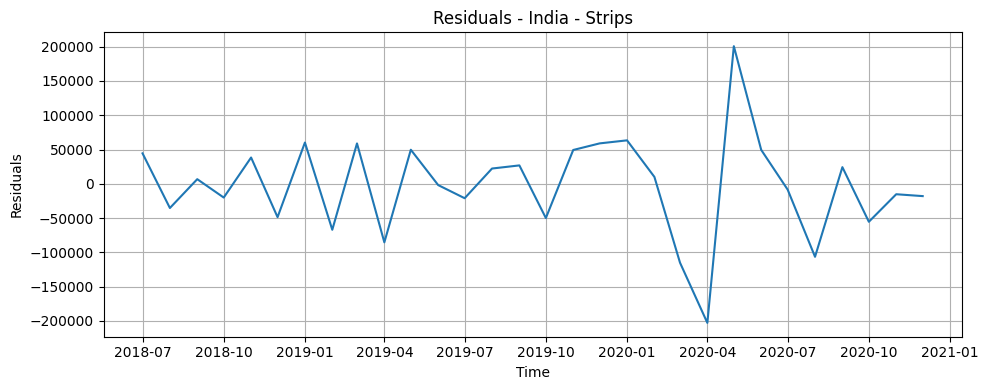

<Figure size 1000x400 with 0 Axes>

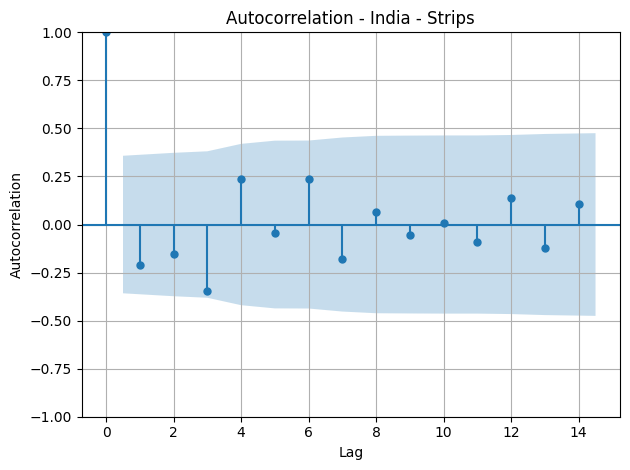

<Figure size 1000x400 with 0 Axes>

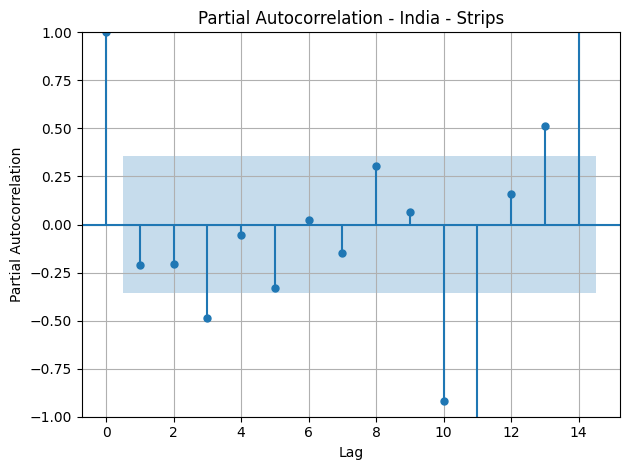

Mean Absolute Error (MAE) for India - Strips: 168007.51766739812
Mean Absolute Percentage Error (MAPE) for India - Strips: 0.4960230845067251%


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the sub-clusters and product types of interest
sub_clusters = ['China', 'India']
product_types = {'China': ['Ancillaries'],
                 'India': ['Strips']}

# Loop over each sub-cluster and product type
for sub_cluster in sub_clusters:
    for product_type in product_types[sub_cluster]:
        print(f"ACF and PACF for {sub_cluster} - {product_type}:")

        # Filter the data for the specific sub-cluster and product type
        subset = df_demand[(df_demand['Sub Cluster'] == sub_cluster) & (df_demand['Product Type'] == product_type)]

        # Sort the data by date in ascending order
        subset = subset.sort_values('Date')

        # Set the 'Date' column as the index
        subset = subset.set_index('Date')

        # Extract the 'Value' column as the time series data
        data = subset['Actual Demand']

        # Split data into training and test set
        train, test = data[:-5], data[-5:]

        # Fit the ARIMA model
        model = ARIMA(data, order=(2, 2, 0))
        model_fit = model.fit()
        print(model_fit.summary())

        # Make predictions on test set
        predictions = model_fit.forecast(steps=5)

        # Calculate the residuals
        residuals = model_fit.resid

        # Plot the residuals
        plt.figure(figsize=(10, 4))
        plt.plot(residuals)
        plt.xlabel('Time')
        plt.ylabel('Residuals')
        plt.title(f'Residuals - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot the ACF of residuals
        plt.figure(figsize=(10, 4))
        plot_acf(residuals, lags=nlags)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot the PACF of residuals
        plt.figure(figsize=(10, 4))
        plot_pacf(residuals, lags=nlags, method='ols')
        plt.xlabel('Lag')
        plt.ylabel('Partial Autocorrelation')
        plt.title(f'Partial Autocorrelation - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Calculate and print MAE and MAPE
        mae = mean_absolute_error(test, predictions)
        mape = mean_absolute_percentage_error(test, predictions)
        print(f"Mean Absolute Error (MAE) for {sub_cluster} - {product_type}: {mae}")
        print(f"Mean Absolute Percentage Error (MAPE) for {sub_cluster} - {product_type}: {mape}%")

        # Append the forecast to the DataFrame for Code 2
        forecast_dates = predictions.index  # extract dates from predictions
        for f_date, f_value in zip(forecast_dates, predictions.values):
            forecast_df.loc[len(forecast_df)] = [sub_cluster, product_type, f_date, f_value]



In [ ]:
forecast_df

Sub Cluster Product Type       Date  Forecasted Demand
0   APAC Distributor  Ancillaries 2020-08-01       49459.241618
1   APAC Distributor  Ancillaries 2020-09-01       38962.776068
2   APAC Distributor  Ancillaries 2020-10-01       37454.381534
3   APAC Distributor  Ancillaries 2020-11-01       37237.617705
4   APAC Distributor  Ancillaries 2020-12-01       37206.467660
5   APAC Distributor       Meters 2020-08-01       22896.483770
6   APAC Distributor       Meters 2020-09-01       22763.903798
7   APAC Distributor       Meters 2020-10-01       22771.356658
8   APAC Distributor       Meters 2020-11-01       22770.937703
9   APAC Distributor       Meters 2020-12-01       22770.961254
10  APAC Distributor       Strips 2020-08-01      242271.158065
11  APAC Distributor       Strips 2020-09-01      230943.252138
12  APAC Distributor       Strips 2020-10-01      229432.340899
13  APAC Distributor       Strips 2020-11-01      229230.816206
14  APAC Distributor       Strips 2020-12-01      229203.936928
15             China       Meters 2020-08-01       26356.907920
16             China       Meters 2020-09-01       26307.213161
17             China       Meters 2020-10-01       26307.400705
18             China       Meters 2020-11-01       26307.399997
19             China       Meters 2020-12-01       26307.400000
20             China       Strips 2020-08-01      347329.247755
21             China       Strips 2020-09-01      346816.386489
22             China       Strips 2020-10-01      346823.086397
23             China       Strips 2020-11-01      346822.998871
24             China       Strips 2020-12-01      346823.000015
25             India  Ancillaries 2020-08-01       32518.943540
26             India  Ancillaries 2020-09-01       29020.868716
27             India  Ancillaries 2020-10-01       30061.660265
28             India  Ancillaries 2020-11-01       29751.990774
29             India  Ancillaries 2020-12-01       29844.127565
30             India       Meters 2020-08-01       33974.881709
31             India       Meters 2020-09-01       33829.836257
32             India       Meters 2020-10-01       33833.028755
33             India       Meters 2020-11-01       33832.958487
34             India       Meters 2020-12-01       33832.960033
35             China  Ancillaries 2021-01-01      505465.898366
36             China  Ancillaries 2021-02-01      690020.070586
37             China  Ancillaries 2021-03-01      551674.696991
38             China  Ancillaries 2021-04-01      637817.639017
39             China  Ancillaries 2021-05-01      681735.061484
40             India       Strips 2021-01-01      246083.358369
41             India       Strips 2021-02-01      204788.502010
42             India       Strips 2021-03-01      180114.368630
43             India       Strips 2021-04-01      142020.881673
44             India       Strips 2021-05-01      103536.300981

In [ ]:
import plotly.graph_objects as go

def plot_actual_vs_forecast(actual_demand, forecast_demand, title, forecast_label):
    # Filter for meters
    actual_demand_meters = actual_demand[(actual_demand['Product Type'] == 'Meters')]
    forecast_demand_meters = forecast_demand[(forecast_demand['Product Type'] == 'Meters')]

    # Create the figure
    fig = go.Figure()

    # List of unique Sub Clusters (countries)
    sub_clusters = actual_demand_meters['Sub Cluster'].unique()

    # Loop through each Sub Cluster and add traces to the figure
    for sub_cluster in sub_clusters:
        # Filter data for the specific Sub Cluster
        actual_sub_cluster = actual_demand_meters[actual_demand_meters['Sub Cluster'] == sub_cluster]
        forecast_sub_cluster = forecast_demand_meters[forecast_demand_meters['Sub Cluster'] == sub_cluster]

        # Add trace for actual demand
        fig.add_trace(go.Scatter(
            x=actual_sub_cluster['Date'],
            y=actual_sub_cluster['Actual Demand'],
            mode='lines+markers',
            name=f'Actual Demand - {sub_cluster}'
        ))

        # Add trace for forecasted demand
        fig.add_trace(go.Scatter(
            x=forecast_sub_cluster['Date'],
            y=forecast_sub_cluster['Forecasted Demand'],
            mode='lines+markers',
            name=f'{forecast_label} - {sub_cluster}'
        ))

    # Add titles and labels
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Demand',
        legend_title='Legend'
    )

    # Show figure
    fig.show()

In [ ]:
plot_actual_vs_forecast(df_demand, forecast_df, 'Actual Demand vs Forecasted Demand for Meters by Sub Cluster', 'Forecasted Demand')

![image-2.png](attachment:image-2.png)

When looking only at the forecasted period of Meters we can see that the forecast deviates quite a bit. The forecast is quite steady while the actual demand is varying more. We accept this for the moment, given that the main purpose of this assignment is the demand constraint and not the forecast.

However we would like to use a more hands-on method with LSTM as an alterative.

## <a id='toc5_2_'></a>[3.2 LSTM](#toc0_)

In addition to the ARIMA also the LSTM (Long short-term momery) is used which is a artificial neural network. Unlike many other neural network is has the abilitiy to save historical inputs . It is well equipped to handle long term dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Load the data into a pandas DataFrame
data = pd.read_excel('/content/Demand by products and country consildated for multivariate analysis.xlsx')  # Replace 'your_data.csv' with the actual file path

data

Timestamps  Ancillaries/APAC Distributor  Ancillaries/China  \
0   01.07.2018                         34605                140   
1   01.08.2018                         42043               7529   
2   01.09.2018                         35021               4430   
3   01.10.2018                         33297               1291   
4   01.11.2018                         39241                200   
5   01.12.2018                         50713                177   
6   01.01.2019                         24882               7936   
7   01.02.2019                         34910                 10   
8   01.03.2019                         42171               8162   
9   01.04.2019                         30654                 64   
10  01.05.2019                         24254               1700   
11  01.06.2019                         48926               5622   
12  01.07.2019                         44345                862   
13  01.08.2019                         52192                 57   
14  01.09.2019                         41650               5777   
15  01.10.2019                         34972                930   
16  01.11.2019                         97117               2328   
17  01.12.2019                         24417               9654   
18  01.01.2020                         11636             440278   
19  01.02.2020                          2048             210216   
20  01.03.2020                         10188             319968   
21  01.04.2020                         11696             416573   
22  01.05.2020                         16740             502115   
23  01.06.2020                         19812             590421   
24  01.07.2020                        122501             423560   
25  01.08.2020                          9838             444953   
26  01.09.2020                         41951             666760   
27  01.10.2020                         56687             349646   
28  01.11.2020                         62980             654505   
29  01.12.2020                        103982             559017   

    Ancillaries/India  Meters/APAC Distributor  Meters/China  Meters/India  \
0               38089                    17125         13418         16937   
1               21203                    21223         17078         28100   
2               33590                    19681         41123         60607   
3               27407                    17575         34210         37026   
4               70732                    29903         59642         51756   
5               20373                    29048         18647         23253   
6               35120                    10004         51929         49783   
7               26145                    20766          3259         25878   
8               27298                    27664         38915         52309   
9               23745                    22632         29872         16409   
10              29312                    20000         40785         32397   
11              34472                    30275         29561         41748   
12              25211                    22807         12734         22243   
13              24529                    29274         26119         30228   
14              29570                    37647         40109         35366   
15              18087                    23547         17340         36967   
16              29022                    28996         16331         50088   
17              53439                    23876          8461         68911   
18              23739                    17826         10300         21677   
19              22138                    16603          8930         26137   
20              42527                    21299         19610         26201   
21              12113                      548         29890          4870   
22              27561                     3640         39740         26597   
23              29391                    56777        

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_excel('/content/Demand by products and country consildated for multivariate analysis.xlsx')  # Replace 'your_dataset.csv' with your actual dataset file
data['Timestamps'] = pd.to_datetime(data['Timestamps'])
data.set_index('Timestamps', inplace=True)

# Separate the products into individual time series
ancillaries_APAC = data['Ancillaries/APAC Distributor'].values.reshape(-1, 1)
meters_APAC = data['Meters/APAC Distributor'].values.reshape(-1, 1)
strips_APAC = data['Strips/APAC Distributor'].values.reshape(-1, 1)
ancillaries_China = data['Ancillaries/China'].values.reshape(-1, 1)
meters_China = data['Meters/China'].values.reshape(-1, 1)
strips_China = data['Strips/China'].values.reshape(-1, 1)
ancillaries_India = data['Ancillaries/India'].values.reshape(-1, 1)
meters_India = data['Meters/India'].values.reshape(-1, 1)
strips_India = data['Strips/India'].values.reshape(-1, 1)

# Concatenate the individual time series into a single array
combined_data = np.concatenate((ancillaries_APAC, meters_APAC, strips_APAC,ancillaries_China,meters_China,strips_China,ancillaries_India,meters_India,strips_India), axis=1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data)

# Prepare the input sequences and labels
lookback = 12  # Number of previous months to use as input features
n_features = 9  # Number of products

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(lookback, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



Epoch 1/50
1/1 - 2s - loss: 0.1824 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.1631 - 10ms/epoch - 10ms/step
Epoch 3/50
1/1 - 0s - loss: 0.1454 - 9ms/epoch - 9ms/step
Epoch 4/50
1/1 - 0s - loss: 0.1292 - 9ms/epoch - 9ms/step
Epoch 5/50
1/1 - 0s - loss: 0.1145 - 10ms/epoch - 10ms/step
Epoch 6/50
1/1 - 0s - loss: 0.1014 - 12ms/epoch - 12ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0899 - 10ms/epoch - 10ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0802 - 11ms/epoch - 11ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0723 - 11ms/epoch - 11ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0663 - 9ms/epoch - 9ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0623 - 9ms/epoch - 9ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0601 - 10ms/epoch - 10ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0596 - 11ms/epoch - 11ms/step
Epoch 14/50
1/1 - 0s - loss: 0.0601 - 11ms/epoch - 11ms/step
Epoch 15/50
1/1 - 0s - loss: 0.0608 - 11ms/epoch - 11ms/step
Epoch 16/50
1/1 - 0s - loss: 0.0611 - 11ms/epoch - 11ms/step
Epoch 17/50
1/1 - 0s - loss: 0.0608 - 15ms/ep

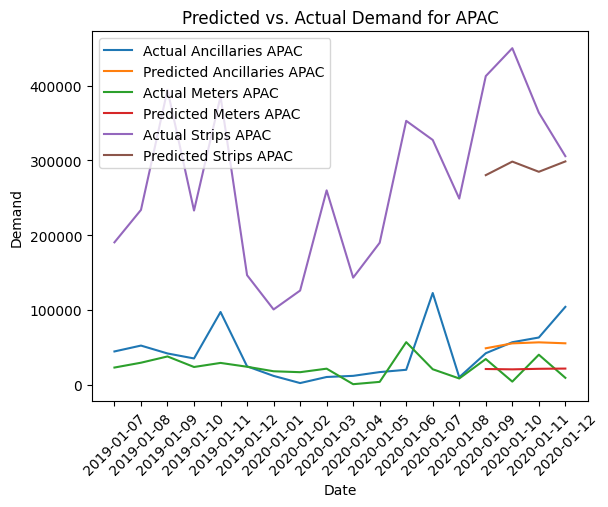

In [ ]:
# Prepare dates for x-axis labels
all_dates = data.index[lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(all_dates, combined_data[lookback:, 0], label='Actual Ancillaries APAC')
plt.plot(all_dates[train_size:], predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(all_dates, combined_data[lookback:, 1], label='Actual Meters APAC')
plt.plot(all_dates[train_size:], predictions[:, 1], label='Predicted Meters APAC')
plt.plot(all_dates, combined_data[lookback:, 2], label='Actual Strips APAC')
plt.plot(all_dates[train_size:], predictions[:, 2], label='Predicted Strips APAC')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand for APAC')
plt.legend()
plt.xticks(rotation=45)
plt.show()



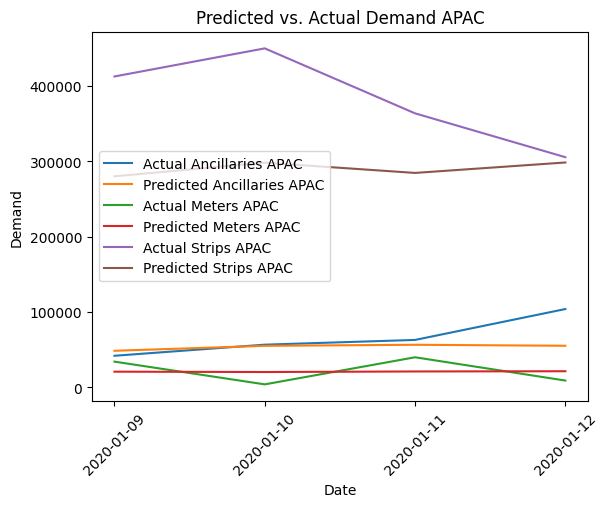

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 0], label='Actual Ancillaries APAC')
plt.plot(test_dates, predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(test_dates, y_test[:, 1], label='Actual Meters APAC')
plt.plot(test_dates, predictions[:, 1], label='Predicted Meters APAC')
plt.plot(test_dates, y_test[:, 2], label='Actual Strips APAC')
plt.plot(test_dates, predictions[:, 2], label='Predicted Strips APAC')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand APAC')
plt.legend()
plt.xticks(rotation=45)
plt.show()

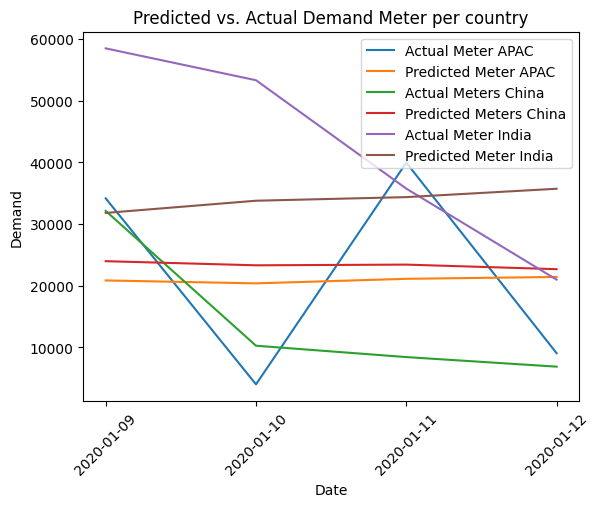

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 1], label='Actual Meter APAC')
plt.plot(test_dates, predictions[:, 1], label='Predicted Meter APAC')
plt.plot(test_dates, y_test[:, 4], label='Actual Meters China')
plt.plot(test_dates, predictions[:, 4], label='Predicted Meters China')
plt.plot(test_dates, y_test[:, 7], label='Actual Meter India')
plt.plot(test_dates, predictions[:, 7], label='Predicted Meter India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Meter per country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

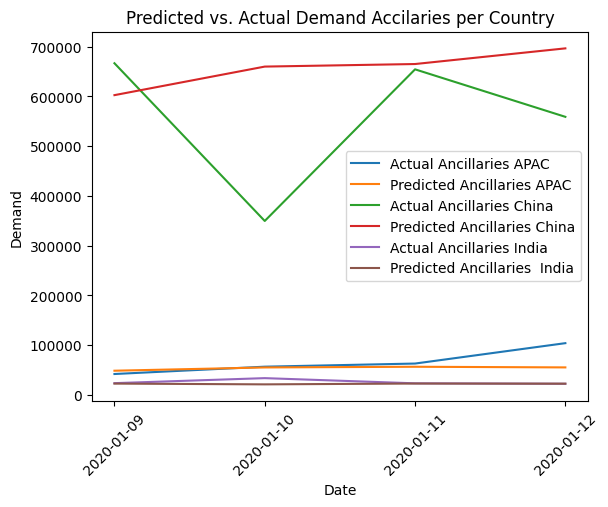

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 0], label='Actual Ancillaries APAC')
plt.plot(test_dates, predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(test_dates, y_test[:, 3], label='Actual Ancillaries China')
plt.plot(test_dates, predictions[:, 3], label='Predicted Ancillaries China')
plt.plot(test_dates, y_test[:, 6], label='Actual Ancillaries India')
plt.plot(test_dates, predictions[:, 6], label='Predicted Ancillaries  India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Accilaries per Country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

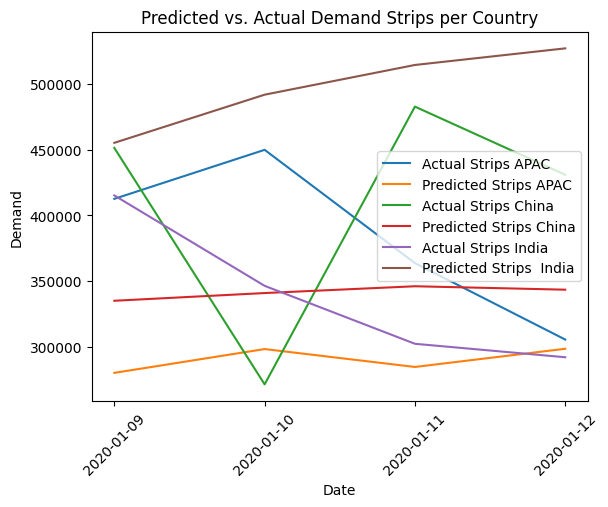

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 2], label='Actual Strips APAC')
plt.plot(test_dates, predictions[:, 2], label='Predicted Strips APAC')
plt.plot(test_dates, y_test[:, 5], label='Actual Strips China')
plt.plot(test_dates, predictions[:, 5], label='Predicted Strips China')
plt.plot(test_dates, y_test[:, 8], label='Actual Strips India')
plt.plot(test_dates, predictions[:, 8], label='Predicted Strips  India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Strips per Country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a DataFrame to store the actual and predicted values
df_results = pd.DataFrame({'Timestamp': test_dates,
                           'Actual_Ancillaries_APAC': y_test[:, 0],
                           'Predicted_Ancillaries_APAC': predictions[:, 0],
                           'Actual_Ancillaries_China': y_test[:, 3],
                           'Predicted_Ancillaries_China': predictions[:,3],
                           'Actual_Ancillaries_India': y_test[:, 6],
                           'Predicted_Ancillaries_India': predictions[:, 6],
                           'Actual_Meters_APAC': y_test[:, 1],
                           'Predicted_Meters_APAC': predictions[:, 1],
                           'Actual_Meters_China': y_test[:, 4],
                           'Predicted_Meters_China': predictions[:, 4],
                           'Actual_Meters_India': y_test[:, 7],
                           'Predicted_Meters_India': predictions[:, 7],
                           'Actual_Strips_APAC': y_test[:, 2],
                           'Predicted_Strips_APAC': predictions[:, 2],
                           'Actual_Strips_China': y_test[:, 5],
                           'Predicted_Strips_China': predictions[:, 5],
                           'Actual_Strips_India': y_test[:, 8],
                           'Predicted_Strips_India': predictions[:, 8]
                           })



# Export the DataFrame to a CSV file
df_results.to_csv('predictions_LSTM.csv', index=False)  # Replace 'predictions.csv' with the desired file name

In [ ]:
#Google Colab - Change path
file_path = '/content/predictions_LSTM.csv'

# Read the Excel file, specifying the sheet name and the range of rows to read
LSTM_predictions3= pd.read_csv(file_path, sep=',')

In [ ]:
LSTM_predictions3

Timestamp  Actual_Ancillaries_APAC  Predicted_Ancillaries_APAC  \
0  2020-01-09                  41951.0                   48579.434   
1  2020-01-10                  56687.0                   55139.160   
2  2020-01-11                  62980.0                   56532.816   
3  2020-01-12                 103982.0                   55242.080   

   Actual_Ancillaries_China  Predicted_Ancillaries_China  \
0                  666760.0                    602622.10   
1                  349646.0                    660038.94   
2                  654505.0                    665182.90   
3                  559017.0                    696677.50   

   Actual_Ancillaries_India  Predicted_Ancillaries_India  Actual_Meters_APAC  \
0                   23561.0                    22690.510             34181.0   
1                   33661.0                    21135.062              4006.0   
2                   23223.0                    22799.895             39967.0   
3                   22352.0                    22523.418              9063.0   

   Predicted_Meters_APAC  Actual_Meters_China  Predicted_Meters_China  \
0              20864.633              32146.0               23988.002   
1              20390.285              10274.0               23318.482   
2              21125.203               8432.0               23431.928   
3              21431.140               6880.0               22690.848   

   Actual_Meters_India  Predicted_Meters_India  Actual_Strips_APAC  \
0              58509.0               31815.950            412630.0   
1              53340.0               33794.770            449949.0   
2              35759.0               34379.605            363700.0   
3              20996.0               35735.740            305511.0   

   Predicted_Strips_APAC  Actual_Strips_China  Predicted_Strips_China  \
0              280147.88             451414.0               335042.66   
1              298268.30             271394.0               340911.72   
2              284637.97             482836.0               346082.97   
3              298491.06             430977.0               343474.47   

   Actual_Strips_India  Predicted_Strips_India  
0             415224.0               455270.75  
1             346405.0               491927.38  
2             302287.0               514549.30  
3             292043.0               527189.70

In [ ]:
import pandas as pd
import numpy as np

# Create an empty DataFrame to store MAPE, MAE, and MSE
mape_mae_mse_data = pd.DataFrame(columns=['Product', 'Region', 'MAPE', 'MAE', 'MSE'])

# Get the list of products and regions
products = ['Ancillaries', 'Meters', 'Strips']
regions = ['APAC', 'China', 'India']

# Iterate over each product and region combination
for product in products:
    for region in regions:
        # Define the column names for actual and predicted values
        actual_column = 'Actual_{}_{}'.format(product, region)
        predicted_column = 'Predicted_{}_{}'.format(product, region)

        # Filter the actual data for the current product and region
        filtered_data = LSTM_predictions3[[actual_column, predicted_column]]

        # Calculate MAPE, MAE, and MSE
        absolute_error = np.abs(filtered_data[actual_column] - filtered_data[predicted_column])
        absolute_percentage_error = absolute_error / filtered_data[actual_column]
        mape = np.mean(absolute_percentage_error) * 100
        mae = np.mean(absolute_error)
        mse = np.mean(absolute_error**2)

        # Append the results to the mape_mae_mse_data DataFrame
        mape_mae_mse_data = mape_mae_mse_data.append({
            'Product': product,
            'Region': region,
            'MAPE': mape,
            'MAE': mae,
            'MSE': mse
        }, ignore_index=True)

# Display the mape_mae_mse_data DataFrame
print(mape_mae_mse_data)





       Product Region        MAPE           MAE           MSE
0  Ancillaries   APAC   18.910304   15840.84450  6.158695e+08
1  Ancillaries  China   31.162432  130717.31000  2.988047e+10
2  Ancillaries  India   10.873867    3497.73775  3.946632e+07
3       Meters   APAC  157.890977   15227.64725  2.384387e+08
4       Meters  China  140.011408   13003.31400  1.779230e+08
5       Meters  India   39.081235   15589.35375  3.284244e+08
6       Strips   APAC   22.463356   92561.19750  1.171466e+10
7       Strips  China   25.005129  102536.15500  1.118327e+10
8       Strips  India   50.597641  158244.53250  3.078244e+10


**Forecast Metrics ARIMA**

In [ ]:
forecast_metrics_df

Sub Cluster Product Type      MAPE            MAE           MSE
0  APAC Distributor  Ancillaries  1.097760   30871.999730  1.414062e+09
1  APAC Distributor       Meters  1.751354   15158.592036  2.364764e+08
2  APAC Distributor       Strips  0.315231  123902.299153  2.111701e+10
3             China       Meters  1.450507   13741.579092  2.157983e+08
4             China       Strips  0.234054   90817.589756  9.023246e+09
5             India  Ancillaries  0.396522    7912.254066  8.262932e+07
6             India       Meters  0.339963   14019.250965  2.564677e+08

In [ ]:
# Filter by column Predicted_Meters APAC, Predicted_Meters China and Predicted_Meters India
LSTM_predictions2 = LSTM_predictions3[['Timestamp', 'Predicted_Meters_APAC', 'Predicted_Meters_China', 'Predicted_Meters_India']]

In [ ]:
LSTM_predictions2

Timestamp  Predicted_Meters_APAC  Predicted_Meters_China  \
0  2020-01-09              20864.633               23988.002   
1  2020-01-10              20390.285               23318.482   
2  2020-01-11              21125.203               23431.928   
3  2020-01-12              21431.140               22690.848   

   Predicted_Meters_India  
0               31815.950  
1               33794.770  
2               34379.605  
3               35735.740

In [ ]:
# Convert to long format
LSTM_predictions2  = pd.melt(LSTM_predictions2 , id_vars=['Timestamp'], value_vars=['Predicted_Meters_APAC', 'Predicted_Meters_China', 'Predicted_Meters_India'],
                  var_name='Sub Cluster', value_name='Forecasted Demand')

# Map the 'Sub Cluster' names to the desired format
sub_cluster_map = {'Predicted_Meters_APAC': 'APAC Distributor',
                   'Predicted_Meters_China': 'China',
                   'Predicted_Meters_India': 'India'}

# Replace the names in the 'Sub Cluster' column
LSTM_predictions2 ['Sub Cluster'] = LSTM_predictions2 ['Sub Cluster'].map(sub_cluster_map)

# Add a 'Product Type' column
LSTM_predictions2 ['Product Type'] = 'Meters'

# Reorder the columns
LSTM_predictions2  = LSTM_predictions2 [['Sub Cluster', 'Product Type', 'Timestamp', 'Forecasted Demand']]

# Rename the 'Timestamp' column to 'Date'
LSTM_predictions2  = LSTM_predictions2.rename(columns={'Timestamp': 'Date'})

# Convert the 'Date' column to the correct date format (Day in the middle)
LSTM_predictions2['Date'] = pd.to_datetime(LSTM_predictions2['Date'], format='%Y-%d-%m')

# Display the DataFrame
print(LSTM_predictions2 )

         Sub Cluster Product Type       Date  Forecasted Demand
0   APAC Distributor       Meters 2020-09-01          20864.633
1   APAC Distributor       Meters 2020-10-01          20390.285
2   APAC Distributor       Meters 2020-11-01          21125.203
3   APAC Distributor       Meters 2020-12-01          21431.140
4              China       Meters 2020-09-01          23988.002
5              China       Meters 2020-10-01          23318.482
6              China       Meters 2020-11-01          23431.928
7              China       Meters 2020-12-01          22690.848
8              India       Meters 2020-09-01          31815.950
9              India       Meters 2020-10-01          33794.770
10             India       Meters 2020-11-01          34379.605
11             India       Meters 2020-12-01          35735.740


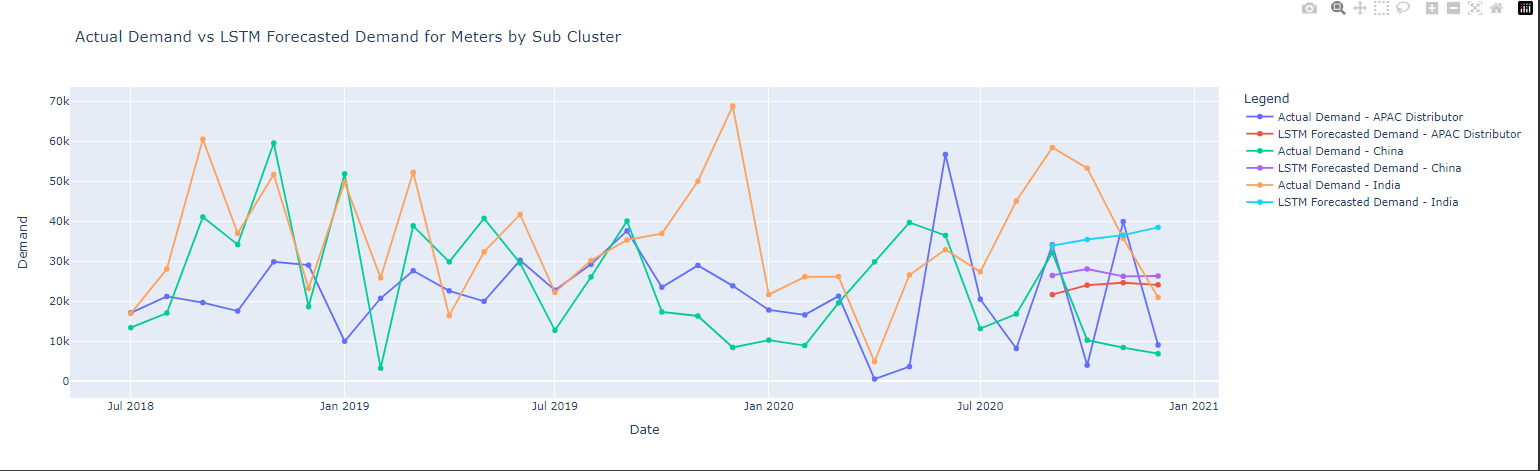

In [ ]:
plot_actual_vs_forecast(df_demand, LSTM_predictions2, 'Actual Demand vs LSTM Forecasted Demand for Meters by Sub Cluster', 'LSTM Forecasted Demand')

LSTM also forecasts the demand quite steady as ARIMA. In comparision the MSE in LSTM is a bit smaller and the depicted trend seems to be also capturing the upwards movement of the demand.

# <a id='toc6_'></a>[4.Capacity](#toc0_)

## <a id='toc6_1_'></a>[4.1 Capacity by Product](#toc0_)


In this notebook, we will create a simple model to allocate a medical product to different countries. Our goal is to maximize the overall profit, but as this is a medical product, we need to ensure that each country receives at least a minimum quantity for humanitarian reasons.

The constraints are:
1. Each country must receive at least the minimum quantity specified.
2. Allocate the rest of the products to maximize profit.



In [ ]:
file_path = '/Users/stephaniegessler/OneDrive - IE Students/Reinforcement Learning/Assignment 2/Data/capacity.xlsx'
file_path = '/content/capacity.xlsx'
# Read the Excel file, specifying the sheet name and the range of rows to read
capacity= pd.read_excel(file_path, sheet_name='view')


product_types = capacity['Product Type']
high_capacity = capacity['High Capacity (Units/month)']

# Create a new DataFrame with 'Product Type' and 'High Capacity per Month'
capacity = pd.DataFrame({'Product Type': product_types, 'High Capacity (Units/month)': high_capacity})

capacity

Product Type  High Capacity (Units/month)
0      Strips                        800000
1       Meters                        82500
2  Ancillaries                       250000

## <a id='toc6_2_'></a>[4.2. Cost by Product Types](#toc0_)


There is also a cost associated with producing or procuring the medical product. This cost will impact the overall profit. In our example, the costs are for one strip, one meter, and one ancillary. We will now include these costs in our model to calculate the net profit.


In [ ]:
# Creating a dictionary with product types and their corresponding costs
cost_dict = {
    'Product Type': ['Strips', 'Meters', 'Ancillaries'],
    'Costs per Unit': [1.00, 7.00, 0.25]
}
df_costs = pd.DataFrame(cost_dict)
df_costs


Product Type  Costs per Unit
0       Strips            1.00
1       Meters            7.00
2  Ancillaries            0.25

## <a id='toc6_3_'></a>[4.3. Profit each product type by country](#toc0_)

In [ ]:
import pandas as pd

# Creating a dictionary with sub clusters, product types and their corresponding costs
cost_dict = {
    'Sub Cluster': ['APAC Distributor', 'APAC Distributor', 'APAC Distributor',
                    'China', 'China', 'China',
                    'India', 'India', 'India'],
    'Product Type': ['Strips', 'Meters', 'Ancillaries',
                     'Strips', 'Meters', 'Ancillaries',
                     'Strips', 'Meters', 'Ancillaries'],
    'Sales per Unit': [1.10, 45.00, 0.28,
                       0.95, 38.00, 0.22,
                       1.05, 42.00, 0.26]
}

# Creating the dataframe
df_sales= pd.DataFrame(cost_dict)

# Printing the dataframe
df_sales


Sub Cluster Product Type  Sales per Unit
0  APAC Distributor       Strips            1.10
1  APAC Distributor       Meters           45.00
2  APAC Distributor  Ancillaries            0.28
3             China       Strips            0.95
4             China       Meters           38.00
5             China  Ancillaries            0.22
6             India       Strips            1.05
7             India       Meters           42.00
8             India  Ancillaries            0.26

# <a id='toc7_'></a>[5. Optimization](#toc0_)

For the optimization we are selecting various algorithms to calculate the optimal sales volume. We will use



*   Model 1: SLSQP (Non-linear Programming) - scipy
*   Model 2: Cobyla (Non-linear Programming) - scipy
*   Model 3: Trust region constraint (Non-linear Programming) - scipy
*   Model 4:CBC (Coin-or branch and cut) Model (Linear Programming) with Pulp
*   Model 5: Broyden-Fletcher Goldfarb-Shanno (Non-linear Programming/BFGS) -scipy
*   Model 6: Evolutionary - Deap
*   Model 7: GLPK (GNU Linear Programming Kit) -Pyomo



---



**Linear programming vs. Non-linear Programming**

Linear programming (LP) involves linear relationships between the objective function and constraints, including capacity constraints.
Non-linear programming (NLP) deals with non-linear relationships between the objective function and constraints, including capacity constraints.
 LP uses linear inequalities or equalities, while NLP involves non-linear equations or inequalities. LP is easier to solve with established algorithms , while NLP requires more sophisticated methods.







## <a id='toc7_1_'></a>[5.1.Optimization for meters products](#toc0_)

We will start with a simple optimization, demand per product at time zero and then we will extent the complexity further.

In [ ]:
# Pivoting the DataFrame
pivot_table = LSTM_predictions2.pivot(index='Date', columns='Sub Cluster', values='Forecasted Demand')

# Converting the pivoted DataFrame to a NumPy array
forecasted_demand = pivot_table.to_numpy()

print(forecasted_demand)

[[20864.633 23988.002 31815.95 ]
 [20390.285 23318.482 33794.77 ]
 [21125.203 23431.928 34379.605]
 [21431.14  22690.848 35735.74 ]]


In [ ]:
import numpy as np

# Constants
sales_per_unit = np.array([45.00, 38.00, 42.00])
cost_per_unit = np.array([7, 7, 7])
weights = np.array([2, 1, 1.5])


num_periods = 4
num_products = 3

## <a id='toc7_2_'></a>[5.2. Interpretation of the Results](#toc0_)


1. 💹 **Objective Value**: The objective value is indicative of the profit made.

    - If the objective value is positive 2050132.5, this indicates that the gain in profit.


2. 📏 **Capacity Constraint Value**: The capacity constraint value indicates how much of the capacity is being used.

    - If the value is very close to zero (e.g., `Capacity constraint value: -7.28e-11`), this means that the production is utilizing almost the entire capacity. Such small negative numbers near zero can be due to numerical inaccuracies in floating-point computations and should practically be considered as zero.

3. 📦**Forecast Constraint Value for Product A**: The forecast constraint value for Product A indicates whether the production meets the forecasted demand.

    - If the value is positive (e.g., `Forecast constraint for product A: 20038.25`), this means that Product A is produced less than the forecasted demand.

4. 📦**Forecast Constraint Value for Product B**: Similar interpretation as for Product A.

    - If the value is very close to zero (e.g., `Forecast constraint for product B: -1.46e-11`), this means that Product B is produced exactly at the forecasted demand. Small negative numbers near zero should be considered as zero.

5. 📦:**Forecast Constraint Value for Product C**: Similar interpretation as for Product A and B.


## <a id='toc7_3_'></a>[5.3. Constraints Block](#toc0_)

In the constraint block all constraints that are applied will be put down. In this case:



*   Capacity Constraint
*   Forecast Constraint
*   Minimum Production Constraint
*   Make capacity Constraint
*   Make forecast constraint
*   Make minimum production constrain








In [ ]:
def objective(x):
    x = np.reshape(x, (num_periods, num_products))
    return -np.sum((sales_per_unit - cost_per_unit) * x)

def capacity_constraint(x, t):
    x = np.reshape(x, (num_periods, num_products))
    return 82500 - np.sum(weights * x[t])

def forecast_constraint(x, t, i):
    x = np.reshape(x, (num_periods, num_products))
    return forecasted_demand[t][i] - x[t][i]

def minimum_production_constraint(x, t, i):
    x = np.reshape(x, (num_periods, num_products))
    return x[t][i] - 10000

def make_capacity_constraint(t):
    return lambda x: capacity_constraint(x, t)

def make_forecast_constraint(t, i):
    return lambda x: forecast_constraint(x, t, i)

def make_minimum_production_constraint(t, i):
    return lambda x: minimum_production_constraint(x, t, i)

cons = []
for t in range(num_periods):
    cons.append({'type': 'ineq', 'fun': make_capacity_constraint(t)})
    for i in range(num_products):
        cons.append({'type': 'ineq', 'fun': make_forecast_constraint(t, i)}) # we added the constraint that min 10000 must be producted per country
        cons.append({'type': 'ineq', 'fun': make_minimum_production_constraint(t, i)})


## <a id='toc7_4_'></a>[5.4. Functions](#toc0_)

In [ ]:
# Function to print results
def print_results(result, method_name):
    x_optimal = np.reshape(result.x, (num_periods, num_products))
    print(f'------ {method_name} ------')
    print('Optimal objective value:', -result.fun)
    print('Optimal solution:')
    countries = ['China', 'APAC', 'India']
    for t in range(num_periods):
        for i in range(num_products):
            print(f'Period {t+1}, Country {countries[i]}: {x_optimal[t][i]}')
    #print('Optimal objective value:', -result.fun)
    print('\n')

In [ ]:
def constraints_results(result, algorithm_name):
    x = np.reshape(result.x, (num_periods, num_products))  # reshape to the appropriate periods and product types

    # Print Algorithm Name
    print(f"------ {algorithm_name} ------")

    # Print the Objective Value
    print('Optimal objective value:', -objective(result.x))

    # Iterate through each period and product type
    for t in range(num_periods):
        # Print the Capacity Constraint Value for each period
        print(f'Capacity constraint value for period {t + 1}:', make_capacity_constraint(t)(result.x))

        # Print the Forecast Constraint for each product type in each period
        for i in range(num_products):
            print(f'Forecast constraint for product {i + 1} in period {t + 1}:', make_forecast_constraint(t, i)(result.x))
    print("\n")

In [ ]:
def constraints_results(result, algorithm_name):
    x = np.reshape(result.x, (num_periods, num_products))  # reshape to the appropriate periods and product types

    # Define countries
    countries = ['China', 'APAC', 'India']

    # Print Algorithm Name
    print(f"------ {algorithm_name} ------")

    # Print the Objective Value
    print('Optimal objective value:', -objective(result.x))

    # Iterate through each period and product type
    for t in range(num_periods):
        # Print the Capacity Constraint Value for each period
        print(f'Capacity constraint value for period {t + 1}:', make_capacity_constraint(t)(result.x))

        # Print the Forecast Constraint for each product type in each period with country name
        for i in range(num_products):
            print(f'Forecast constraint for product in Country {countries[i]} in period {t + 1}:', make_forecast_constraint(t, i)(result.x))
    print("\n")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def extract_results(result, num_periods, num_products):
    return np.reshape(result.x, (num_periods, num_products))

def compare_algorithms(results_dict, num_periods, num_products):
    # Data for plotting
    countries = ['China', 'APAC', 'India']
    x = np.arange(len(countries))

    # Plotting configurations
    bar_width = 0.35 / len(results_dict)
    opacity = 0.8
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plotting the results
    plt.figure(figsize=(10, 6))

    for period in range(num_periods):
        plt.subplot(2, 2, period + 1)

        for index, (algorithm_name, result) in enumerate(results_dict.items()):
            algorithm_results = extract_results(result, num_periods, num_products)
            plt.bar(x + index * bar_width, algorithm_results[period], bar_width,
                    alpha=opacity, color=colors[index % len(colors)], label=algorithm_name)

        plt.xlabel('Country')
        plt.ylabel('Optimal Solution')
        plt.title(f'Period {period + 1}')
        plt.xticks(x + bar_width * len(results_dict) / 2, countries)
        plt.legend()

    plt.tight_layout()
    plt.show()

## <a id='toc7_5_'></a>[5.5. SLSQP MODEL 1 (Sequential Least SQuares Programming)- gradient-free optimization methods](#toc0_)

In [ ]:
import time
from scipy.optimize import minimize

x0 = np.ones(num_periods * num_products) * 10000
bounds = [(0, None)] * (num_periods * num_products)

start_time = time.time()
result_slsqp= minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
end_time = time.time()
time_taken = end_time - start_time

x_optimal = np.reshape(result_slsqp.x, (num_periods, num_products))

print_results(result_slsqp, 'SLSQP')

print(f"Time taken for the algorithm to execute: {time_taken} seconds")



------ SLSQP ------
Optimal objective value: 8069624.326666701
Optimal solution:
Period 1, Country China: 10000.000000000087
Period 1, Country APAC: 23988.002000000073
Period 1, Country India: 25674.665333333414
Period 2, Country China: 10000.00000000009
Period 2, Country APAC: 23318.482000000073
Period 2, Country India: 26121.012000000075
Period 3, Country China: 10000.00000000009
Period 3, Country APAC: 23431.928000000073
Period 3, Country India: 26045.381333333415
Period 4, Country China: 10000.00000000009
Period 4, Country APAC: 22690.848000000075
Period 4, Country India: 26539.43466666674


Time taken for the algorithm to execute: 0.45096611976623535 seconds


In [ ]:
constraints_results(result_slsqp, 'SLSQP')

------ SLSQP ------
Optimal objective value: 8069624.326666701
Capacity constraint value for period 1: -3.7834979593753815e-10
Forecast constraint for product in Country China in period 1: 10864.632999999914
Forecast constraint for product in Country APAC in period 1: -7.275957614183426e-11
Forecast constraint for product in Country India in period 1: 6141.284666666586
Capacity constraint value for period 2: -3.637978807091713e-10
Forecast constraint for product in Country China in period 2: 10390.28499999991
Forecast constraint for product in Country APAC in period 2: -7.275957614183426e-11
Forecast constraint for product in Country India in period 2: 7673.757999999922
Capacity constraint value for period 3: -3.7834979593753815e-10
Forecast constraint for product in Country China in period 3: 11125.202999999912
Forecast constraint for product in Country APAC in period 3: -7.275957614183426e-11
Forecast constraint for product in Country India in period 3: 8334.223666666589
Capacity con

### <a id='toc7_5_1_'></a>[Interpretation of the Results](#toc0_)

1. 💹 **Objective Value**: The objective value is indicative of the profit made.

    - If the objective value is positive 2050132.5, this indicates that the gain in profit.


2. 📏 **Capacity Constraint Value**: The capacity constraint value indicates how much of the capacity is being used.

    - If the value is very close to zero (e.g., `Capacity constraint value: -7.28e-11`), this means that the production is utilizing almost the entire capacity. Such small negative numbers near zero can be due to numerical inaccuracies in floating-point computations and should practically be considered as zero.

3. 📦**Forecast Constraint Value for Product A**: The forecast constraint value for Product A indicates whether the production meets the forecasted demand.

    - If the value is positive (e.g., `Forecast constraint for product A: 20038.25`), this means that Product A is produced less than the forecasted demand.

4. 📦**Forecast Constraint Value for Product B**: Similar interpretation as for Product A.

    - If the value is very close to zero (e.g., `Forecast constraint for product B: -1.46e-11`), this means that Product B is produced exactly at the forecasted demand. Small negative numbers near zero should be considered as zero.

5. 📦:**Forecast Constraint Value for Product C**: Similar interpretation as for Product A and B.

## <a id='toc7_6_'></a>[5.6. Model 2: COBYLA (Constrained Optimization BY Linear Approximation )- gradient-free optimization methods](#toc0_)


Note cobyla does not accept equality constraint, neither bounds. So we need to convert demand equality to an inequality, and rewrite bounds as contraints (x[0] > 0, for instance)



---



The solution of COBYLA is very dependable on the following parameters:

*   __Initial Guess__: The initial guess might not be suitable for the COBYLA algorithm. Sometimes different algorithms require different initializations.

*   __Tolerance and Iterations__: The tolerance and the maximum number of iterations allowed might need adjustment.

*   __Constraints__: The COBYLA algorithm approximates constraints. Sometimes, especially in problems with many constraints, it might not handle them very efficiently.

In [ ]:
# Formulate the Constraints
cobyla_cons = []
for t in range(num_periods):
    cobyla_cons.append({'type': 'ineq', 'fun': make_capacity_constraint(t)})
    for i in range(num_products):
        cobyla_cons.append({'type': 'ineq', 'fun': make_forecast_constraint(t, i)})
        cobyla_cons.append({'type': 'ineq', 'fun': make_minimum_production_constraint(t, i)})
        # Add the bounds as constraints
        cobyla_cons.append({'type': 'ineq', 'fun': lambda x: x[t*num_products + i]})

# Initial Guess
x0 = np.ones(num_periods * num_products) * 10000
start_time = time.time()
# Solve the optimization problem using COBYLA
result_cobyla = minimize(objective, x0, method='COBYLA', constraints=cobyla_cons, options={'maxiter': 80000, 'tol': 1e-9})
end_time = time.time()
time_taken = end_time - start_time
print_results(result_cobyla, 'COBYLA')

print(f"Time taken for the algorithm to execute: {time_taken} seconds")


------ COBYLA ------
Optimal objective value: 7892007.527461443
Optimal solution:
Period 1, Country China: 14904.340922863374
Period 1, Country APAC: 23333.165491237494
Period 1, Country India: 19572.10177535718
Period 2, Country China: 14909.03669510951
Period 2, Country APAC: 23318.482
Period 2, Country India: 19575.629739853994
Period 3, Country China: 14904.338006524766
Period 3, Country APAC: 23333.16540400774
Period 3, Country India: 19572.105721961798
Period 4, Country China: 15109.885075744987
Period 4, Country APAC: 22690.848
Period 4, Country India: 19726.25456567336


Time taken for the algorithm to execute: 7.028325319290161 seconds


In [ ]:
constraints_results(result_cobyla, 'COBYLA')

------ COBYLA ------
Optimal objective value: 7892007.527461443
Capacity constraint value for period 1: -1.4551915228366852e-11
Forecast constraint for product in Country China in period 1: 5960.292077136628
Forecast constraint for product in Country APAC in period 1: 654.8365087625061
Forecast constraint for product in Country India in period 1: 12243.848224642821
Capacity constraint value for period 2: 0.0
Forecast constraint for product in Country China in period 2: 5481.2483048904905
Forecast constraint for product in Country APAC in period 2: 0.0
Forecast constraint for product in Country India in period 2: 14219.140260146003
Capacity constraint value for period 3: 2.9103830456733704e-11
Forecast constraint for product in Country China in period 3: 6220.864993475236
Forecast constraint for product in Country APAC in period 3: 98.76259599225887
Forecast constraint for product in Country India in period 3: 14807.499278038205
Capacity constraint value for period 4: -2.910383045673370

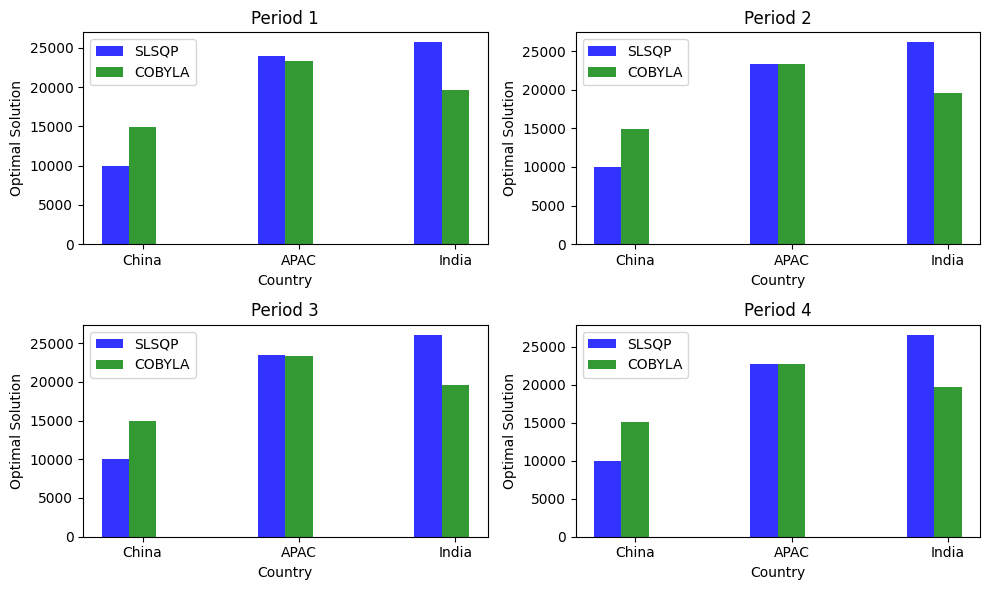

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

## <a id='toc7_7_'></a>[5.6.1 Model 2: Comparision SLSQP vs. COBYLA](#toc0_)


__Constraints:__

>  *    __SLSQP__: Gradient-based optimization algorithm that makes use of the gradients (derivatives) of the objective function and the constraints to find the optimal solution. It handles <span style='color:#098e83'> __both equality and inequality constraints__</span>.
>  *   __COBYLA__: Does not require the derivatives of the objective function or constraints. It linearly approximates the objective function and constraints using a set of linear constraints and then uses a direct search method. It only handles <span style='color:#098e83'> __inequality constraints__</span>.

__Convergence:__

>  *    __SLSQP__: It converged <span style='color:#098e83'> __faster__</span> and to a more accurate solution.
>  *   __COBYLA__: It converged <span style='color:#098e83'> __slower__</span> , especially for high-dimensional problems and also gives a less optimal solution for the profit.


__Performance:__

>  *    __SLSQP__: It performs better on problems with a large number of variables or where the gradients are available.
>  *   __COBYLA__: Might perform better on non-smooth problems with a smaller number of variables.

## <a id='toc7_8_'></a>[5.7. Model 3: Trust Region Constraint](#toc0_)

In [ ]:
from scipy.optimize import minimize, NonlinearConstraint

# Based on previous constraints

# Define the non-linear constraint, lb = lower bound of the constraint, up = upper bound of the constraint
# the constraint is that the capacity_constraint function should be greater than or equal to 0 and less than infinity, used when sensitive to the type of constraints (linear vs. nonlinear)
nonlinear_constraint = NonlinearConstraint(capacity_constraint, lb=0, ub=np.inf)

# Initial guess
x0 = np.ones(num_periods * num_products) * 10000

# Solve the optimization problem using 'trust-constr' method
start_time = time.time()
result_trust_constr = minimize(objective, x0, method='trust-constr', constraints=cons,
                               options={ 'maxiter': 1000})
end_time = time.time()
time_taken = end_time - start_time

# Print results
print_results(result_trust_constr, 'trust-constr')
print(f"Time taken for the algorithm to execute: {time_taken} seconds")


------ trust-constr ------
Optimal objective value: 8069624.278667417
Optimal solution:
Period 1, Country China: 10000.000460531153
Period 1, Country APAC: 23988.001477981703
Period 1, Country India: 25674.664952834344
Period 2, Country China: 10000.000460538287
Period 2, Country APAC: 23318.481477997273
Period 2, Country India: 26121.011619480974
Period 3, Country China: 10000.000460538029
Period 3, Country APAC: 23431.927477987258
Period 3, Country India: 26045.380952821393
Period 4, Country China: 10000.000460551926
Period 4, Country APAC: 22690.847478020925
Period 4, Country India: 26539.434286113516


Time taken for the algorithm to execute: 9.603099584579468 seconds


In [ ]:
constraints_results(result_trust_constr, 'Trust Constr')

------ Trust Constr ------
Optimal objective value: 8069624.278667417
Capacity constraint value for period 1: 0.00017170447972603142
Forecast constraint for product in Country China in period 1: 10864.632539468848
Forecast constraint for product in Country APAC in period 1: 0.0005220182974881027
Forecast constraint for product in Country India in period 1: 6141.285047165657
Capacity constraint value for period 2: 0.00017170468345284462
Forecast constraint for product in Country China in period 2: 10390.284539461712
Forecast constraint for product in Country APAC in period 2: 0.0005220027269388083
Forecast constraint for product in Country India in period 2: 7673.7583805190225
Capacity constraint value for period 3: 0.00017170459614135325
Forecast constraint for product in Country China in period 3: 11125.202539461972
Forecast constraint for product in Country APAC in period 3: 0.0005220127422944643
Forecast constraint for product in Country India in period 3: 8334.22404717861
Capacity 

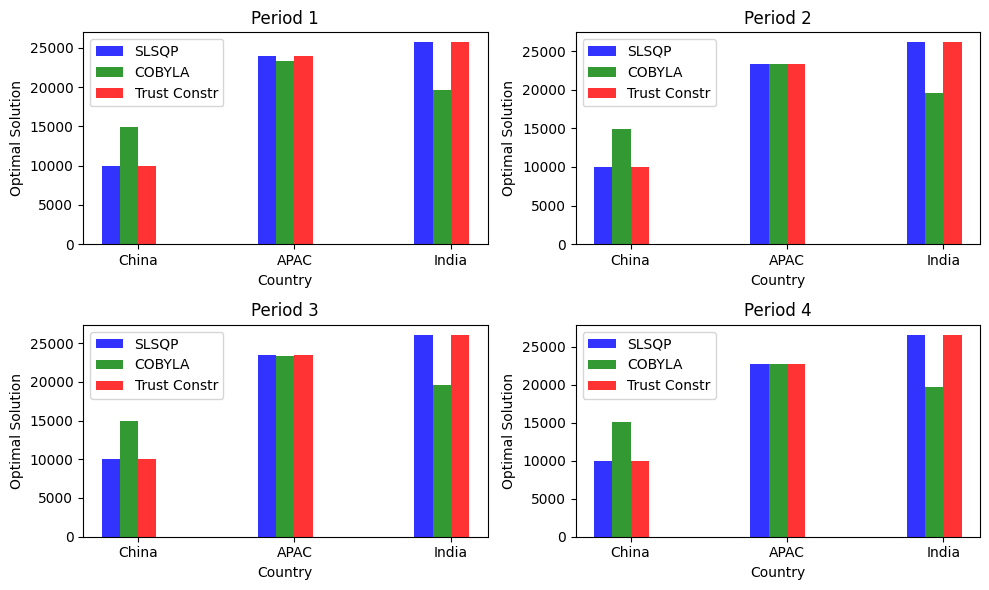

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

### <a id='toc7_8_1_'></a>[5.7.1 Comparision SLSQP vs. Trust Region Constraint](#toc0_)



__Performance:__

>  *    __SLSQP__: IIt's usually faster than trust-constr for problems with a small number of variables, but might not be as robust for complex, highly non-linear problems
>  *   __Trust-constr__: for solving complex, large-scale, or highly non-linear problems with non-linear constraints. It's more robust but might be slower.


__Use case:__

>  *    __SLSQP__: if computational efficiency is a priority and your problem is not highly non-linear. It's also more suited if you have a moderate number of variables
>  *   __Trust-constr__: if your optimization problem is highly non-linear, or if you have non-linear constraints, or if your priority is robustness over speed. It's also more suited if you have a large number of variables

## <a id='toc7_9_'></a>[5.8. Model 4: Pulp using CBC (Coin-or branch and cut) model](#toc0_)

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pulp
import time

# Create a linear programming problem
lp_problem = pulp.LpProblem("ProductionOptimization", pulp.LpMaximize)

# Create decision variables
x = pulp.LpVariable.dicts("production", (range(num_periods), range(num_products)), lowBound=0, cat='Integer')

# Add the objective function
revenue = sum((sales_per_unit[i] - cost_per_unit[i]) * x[t][i] for t in range(num_periods) for i in range(num_products))
lp_problem += revenue, "Total Revenue"

# Add the constraints
for t in range(num_periods):
    # Capacity constraint
    lp_problem += sum(weights[i] * x[t][i] for i in range(num_products)) <= 82500, f"capacity_{t}"

    # Forecast and minimum production constraints
    for i in range(num_products):
        lp_problem += x[t][i] <= forecasted_demand[t][i], f"forecast_{t}_{i}"
        lp_problem += x[t][i] >= 10000, f"min_production_{t}_{i}"

# Solve the problem without showing the solver log
start_time = time.time()
lp_problem.solve(pulp.PULP_CBC_CMD(msg=False))
end_time = time.time()

# Output the results
print(f'------ PuLP ------')
print(f'Optimal objective value: {pulp.value(lp_problem.objective)}')
print('Optimal solution:')
countries = ['China', 'APAC', 'India']
for t in range(num_periods):
    for i in range(num_products):
        print(f'Period {t+1}, Country {countries[i]}: {x[t][i].varValue}')
print('\n')
print(f"Time taken for the algorithm to execute: {end_time - start_time} seconds")

# Create a result object for Pulp
pulp_result = type('', (), {})()  # create an empty object
pulp_result.x = [x[t][i].varValue for t in range(num_periods) for i in range(num_products)]  # assign the optimal solution to the x attribute
pulp_result.success = pulp.LpStatus[lp_problem.status] == 'Optimal'  # check if the solution is optimal

# Add the Pulp result to the results dictionary
results_dict['Pulp'] = pulp_result


------ PuLP ------
Optimal objective value: 8069584.0
Optimal solution:
Period 1, Country China: 10000.0
Period 1, Country APAC: 23986.0
Period 1, Country India: 25676.0
Period 2, Country China: 10000.0
Period 2, Country APAC: 23317.0
Period 2, Country India: 26122.0
Period 3, Country China: 10000.0
Period 3, Country APAC: 23431.0
Period 3, Country India: 26046.0
Period 4, Country China: 10000.0
Period 4, Country APAC: 22690.0
Period 4, Country India: 26540.0


Time taken for the algorithm to execute: 0.008766889572143555 seconds


In [ ]:
constraints_results(pulp_result, 'Pulp-CBC')

------ Pulp-CBC ------
Optimal objective value: 8069584.0
Capacity constraint value for period 1: 0.0
Forecast constraint for product in Country China in period 1: 10864.633000000002
Forecast constraint for product in Country APAC in period 1: 2.0020000000004075
Forecast constraint for product in Country India in period 1: 6139.950000000001
Capacity constraint value for period 2: 0.0
Forecast constraint for product in Country China in period 2: 10390.285
Forecast constraint for product in Country APAC in period 2: 1.481999999999971
Forecast constraint for product in Country India in period 2: 7672.769999999997
Capacity constraint value for period 3: 0.0
Forecast constraint for product in Country China in period 3: 11125.203000000001
Forecast constraint for product in Country APAC in period 3: 0.9279999999998836
Forecast constraint for product in Country India in period 3: 8333.605000000003
Capacity constraint value for period 4: 0.0
Forecast constraint for product in Country China in p

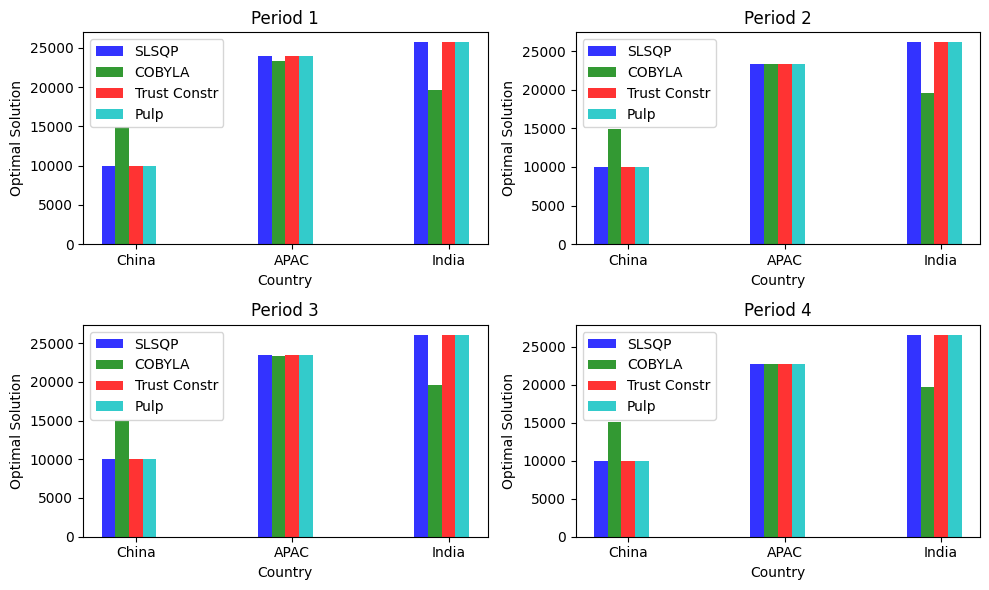

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    "Pulp":pulp_result
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

### <a id='toc7_9_1_'></a>[5.8.1 Comparision SLSQP vs. Pulp](#toc0_)


__Flexibility :__

>  *    __SLSQP__: Is more versatile, as it can be used for wide range of problems
>  *   __Pulp__: can we used only for linear problems


__Use case:__

>  *    __SLSQP__: solving more general constrained optimization problems, including non-linear problems
>  *   __Pulp__: is specifically designed for solving linear programming (LP) problems

__Integer:__
>  *   __Pulp__ If your problem involves integer decision variables, PuLP can be a better choice

__Performance:__
>  *   __Pulp__: Has better Performance in this use case

## <a id='toc7_10_'></a>[5.9. Model 5: Broyden-Fletcher Goldfarb-Shanno/L-BFGS](#toc0_)

In [ ]:
# Reshape forecasted_demand
flattened_forecasted_demand = forecasted_demand.flatten()

# Lower bounds (min production of 10000 for each product in each country)
lower_bounds = np.full_like(flattened_forecasted_demand, 10000)

# Upper bounds are the forecasted demands
upper_bounds = flattened_forecasted_demand

# Create bounds
bounds = list(zip(lower_bounds, upper_bounds))

# Solving using L-BFGS-B method
start_time = time.time()
result_bfgs = minimize(objective, x0, method='L-BFGS-B', bounds=bounds)
end_time = time.time()

# Reshaping the result
x_optimal = np.reshape(result_bfgs.x, (num_periods, num_products))

# Printing results
print_results(result_bfgs, 'L-BFGS-B')
print(f"Time taken for the algorithm to execute: {end_time - start_time} seconds")


------ L-BFGS-B ------
Optimal objective value: 10831547.253
Optimal solution:
Period 1, Country China: 20864.633
Period 1, Country APAC: 23988.002
Period 1, Country India: 31815.95
Period 2, Country China: 20390.285
Period 2, Country APAC: 23318.482
Period 2, Country India: 33794.77
Period 3, Country China: 21125.203
Period 3, Country APAC: 23431.928
Period 3, Country India: 34379.605
Period 4, Country China: 21431.14
Period 4, Country APAC: 22690.848
Period 4, Country India: 35735.74


Time taken for the algorithm to execute: 0.008126258850097656 seconds


In [ ]:
constraints_results(result_bfgs, 'L-BFGS-B')

------ L-BFGS-B ------
Optimal objective value: 10831547.253
Capacity constraint value for period 1: -30941.193000000014
Forecast constraint for product in Country China in period 1: 0.0
Forecast constraint for product in Country APAC in period 1: 0.0
Forecast constraint for product in Country India in period 1: 0.0
Capacity constraint value for period 2: -32291.206999999995
Forecast constraint for product in Country China in period 2: 0.0
Forecast constraint for product in Country APAC in period 2: 0.0
Forecast constraint for product in Country India in period 2: 0.0
Capacity constraint value for period 3: -34751.741500000004
Forecast constraint for product in Country China in period 3: 0.0
Forecast constraint for product in Country APAC in period 3: 0.0
Forecast constraint for product in Country India in period 3: 0.0
Capacity constraint value for period 4: -36656.738
Forecast constraint for product in Country China in period 4: 0.0
Forecast constraint for product in Country APAC in 

### <a id='toc7_10_1_'></a>[5.9.1 Comparision SLSQP vs. Broyden-Fletcher Goldfarb-Shanno/L-BFGS](#toc0_)


__Constraints:__

>  *    __SLSQP__: can handle both equality and inequality constraints, including nonlinear constraints. It is more flexible in dealing with <span style='color:#098e83'> __complex constraint types__</span>.
>  *   __L-BFGS-B__: can only handle  <span style='color:#098e83'> __box constraints (simple bounds on variables)__</span>.


__Convergence:__

>  *    __SLSQP__:  is a Sequential Quadratic Programming method and could be more robust but possibly slower in certain scenarios.
>  *   __L-BFGS-B__: might converge faster for certain problems.


L-BFGS-B is <span style='color:red'> __not an optimal method__</span> to be used because it can't handle the capacity constraint which is a linear inequality constraint that can't be represented as simple bounds on the variables. In this case, SLSQP is more appropriate as it can deal with general linear and nonlinear constraints. You can add penalized constraints to the model with BDGS.

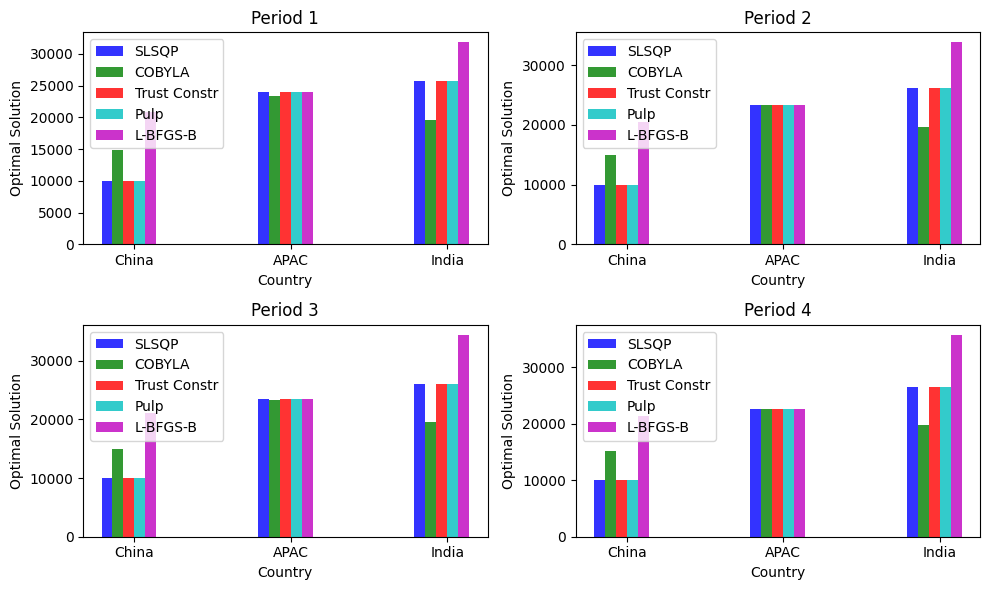

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    "Pulp":pulp_result,
    'L-BFGS-B':result_bfgs
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

The BFGS method is an unconstrained optimization algorithm and does not handle constraints directly. However, you can incorporate the constraints into the objective function by using penalty functions, but it's not the most recommended approach for constrained optimization problems. Nonetheless, if you wish to use the BFGS method and still consider the constraints through penalty functions, you would need to modify the objective function to include these penalty terms

In [ ]:
import numpy as np
import time
from scipy.optimize import minimize

penalty_weight = 1e5  # Weight for the penalty terms, you can tune this

# Modified objective function to include penalty terms
def penalized_objective(x):
    x = np.reshape(x, (num_periods, num_products))
    penalty = 0

    # Capacity constraint penalties
    for t in range(num_periods):
        penalty += max(0, np.sum(weights * x[t]) - 82500)**2

        # Forecasted demand and minimum production constraint penalties
        for i in range(num_products):
            penalty += max(0, x[t][i] - forecasted_demand[t][i])**2
            penalty += max(0, 10000 - x[t][i])**2

    return -np.sum((sales_per_unit - cost_per_unit) * x) + penalty_weight * penalty

# Record the start time
start_time = time.time()

# Solve the optimization problem using BFGS
result_BFGS2 = minimize(penalized_objective, x0, method='BFGS')

# Record the end time immediately after the minimize function has been called
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Reshape the result
x_optimal = np.reshape(result_BFGS2.x, (num_periods, num_products))

# Print the results
print("Optimal Solution:")
countries = ["China", "APAC", "India"]
for t in range(num_periods):
    for i, country in enumerate(countries):
        print(f"Period {t}, Country {country}: {x_optimal[t][i]}")

# Print the time taken
print(f"Time taken for the algorithm to execute: {time_taken} seconds")


Optimal Solution:
Period 0, Country China: 9999.999956664638
Period 0, Country APAC: 23988.002038457194
Period 0, Country India: 25674.66544318994
Period 1, Country China: 9999.99995663184
Period 1, Country APAC: 23318.482038239694
Period 1, Country India: 26121.01211012291
Period 2, Country China: 9999.999956578245
Period 2, Country APAC: 23431.92803827626
Period 2, Country India: 26045.381443508693
Period 3, Country China: 9999.999956505577
Period 3, Country APAC: 22690.84803837081
Period 3, Country India: 26539.434776828522
Time taken for the algorithm to execute: 2.62229585647583 seconds


In [ ]:
constraints_results(result_BFGS2, 'BFGS2')

------ BFGS2 ------
Optimal objective value: 8069624.340233866
Capacity constraint value for period 1: -0.00011657137656584382
Forecast constraint for product in Country China in period 1: 10864.633043335363
Forecast constraint for product in Country APAC in period 1: -3.845719402306713e-05
Forecast constraint for product in Country India in period 1: 6141.28455681006
Capacity constraint value for period 2: -0.00011668773368000984
Forecast constraint for product in Country China in period 2: 10390.28504336816
Forecast constraint for product in Country APAC in period 2: -3.8239693822106346e-05
Forecast constraint for product in Country India in period 2: 7673.757889877088
Capacity constraint value for period 3: -0.00011669579544104636
Forecast constraint for product in Country China in period 3: 11125.203043421756
Forecast constraint for product in Country APAC in period 3: -3.8276259147096425e-05
Forecast constraint for product in Country India in period 3: 8334.22355649131
Capacity co

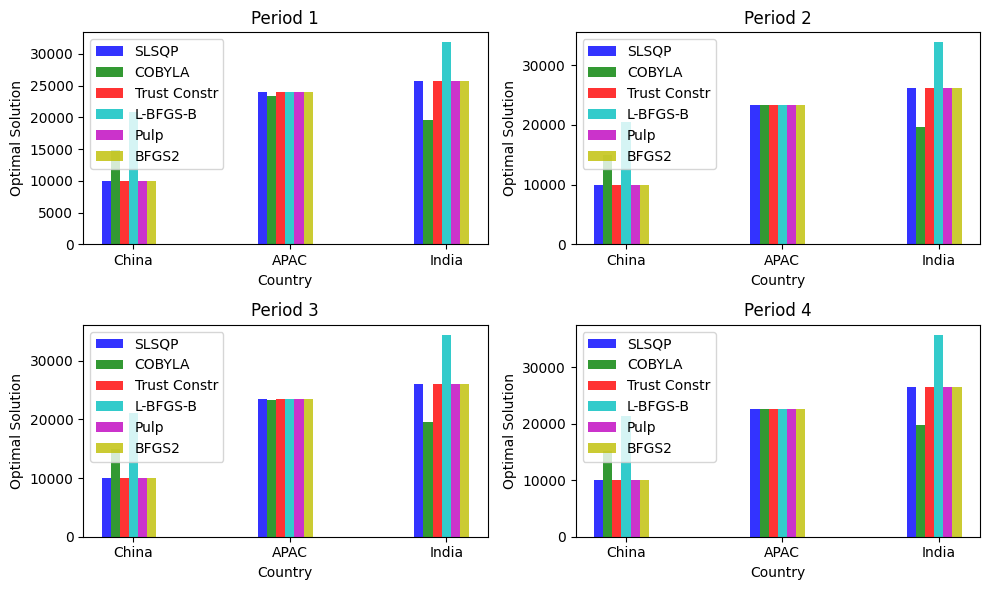

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    'L-BFGS-B':result_bfgs,
    "Pulp":pulp_result,
    'BFGS2':result_BFGS2
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

## <a id='toc7_11_'></a>[5.10 Model 6 Distributed Evolutionary Algorithms in Python (DEAP) - Evolutionary](#toc0_)

In [ ]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.5 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# Create types
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # type of maximizing fitness has positive weights
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create functions
toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 10000, 20000)# Initialize the number
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, num_periods * num_products)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function, calculate the objective value if constraints are satisfied
def evalProduction(individual):
    x = np.reshape(individual, (num_periods, num_products))

    # check capacity constraint
    for t in range(num_periods):
        if np.sum(weights * x[t]) > 82500:
            return -1e9,  # large negative value for violation

    # check forecast constraint and minimum production constraint
    for t in range(num_periods):
        for i in range(num_products):
            if x[t][i] < 10000 or x[t][i] > forecasted_demand[t][i]:
                return -1e9,  # large negative value for violation

    # objective function
    return np.sum((sales_per_unit - cost_per_unit) * x),

toolbox.register("evaluate", evalProduction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10000, up=20000, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create initial population
pop = toolbox.population(n=50)

# Record the start time
start_time = time.time()

# Run the algorithm,eaSimple = a basic genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=None, halloffame=None, verbose=False)

# Record the end time
end_time = time.time()

# Calculate the time taken for optimization
optimization_time = end_time - start_time

# Extract results
best_ind = tools.selBest(pop, 1)[0]
best_x = np.reshape(best_ind, (num_periods, num_products))

# Create a result object for DEAP
deap_result = type('', (), {})()
deap_result.x = best_x
deap_result.objective = evalProduction(best_ind)[0]
deap_result.time_taken = optimization_time

# Add the DEAP result to the results dictionary
results_dict['DEAP'] = deap_result




In [ ]:
# Output the results
for algo, result in results_dict.items():
    if algo == "DEAP":
        print(f'------ {algo} ------')

        # Extracting objective value, solution, and time taken specifically for DEAP
        objective_value = result.objective
        solution = result.x
        time_taken = result.time_taken

        print(f'Optimal objective value: {objective_value}')
        print(f'Time taken for optimization: {time_taken:.4f} seconds')
        print('Optimal solution:')
        countries = ['China', 'APAC', 'India']
        for t in range(num_periods):
            for i in range(num_products):
                print(f'Period {t+1}, Country {countries[i]}: {solution[t][i]}')
        print('\n')

------ DEAP ------
Optimal objective value: 7635994.0
Time taken for optimization: 0.1988 seconds
Optimal solution:
Period 1, Country China: 16694
Period 1, Country APAC: 19324
Period 1, Country India: 19560
Period 2, Country China: 15635
Period 2, Country APAC: 19666
Period 2, Country India: 19990
Period 3, Country China: 18324
Period 3, Country APAC: 18176
Period 3, Country India: 18363
Period 4, Country China: 17685
Period 4, Country APAC: 19539
Period 4, Country India: 18124




In [ ]:
constraints_results(deap_result, 'DEAP')

------ DEAP ------
Optimal objective value: 7635994.0
Capacity constraint value for period 1: 448.0
Forecast constraint for product in Country China in period 1: 4170.633000000002
Forecast constraint for product in Country APAC in period 1: 4664.002
Forecast constraint for product in Country India in period 1: 12255.95
Capacity constraint value for period 2: 1579.0
Forecast constraint for product in Country China in period 2: 4755.285
Forecast constraint for product in Country APAC in period 2: 3652.482
Forecast constraint for product in Country India in period 2: 13804.769999999997
Capacity constraint value for period 3: 131.5
Forecast constraint for product in Country China in period 3: 2801.2030000000013
Forecast constraint for product in Country APAC in period 3: 5255.928
Forecast constraint for product in Country India in period 3: 16016.605000000003
Capacity constraint value for period 4: 405.0
Forecast constraint for product in Country China in period 4: 3746.1399999999994
Forec

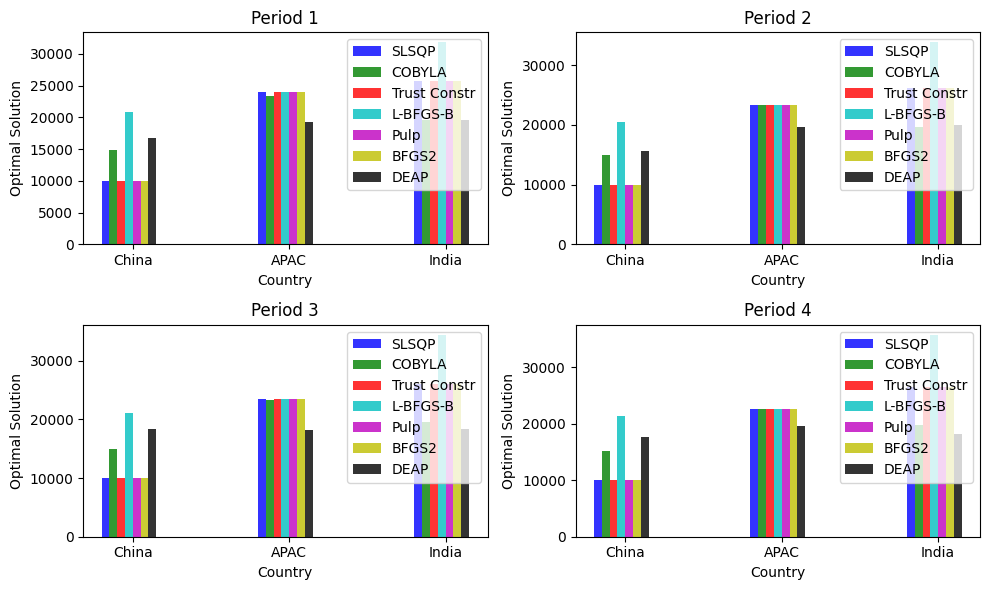

In [ ]:
# Assuming compare_algorithms is a function that takes in the results dictionary
# and the number of periods and products to compare the algorithms.
compare_algorithms(results_dict, num_periods, num_products)

### <a id='toc7_11_1_'></a>[5.10.1 Comparision SLSQP vs. DEAP](#toc0_)



>  *    __SLSQP__: gradient-based optimizer.
>  *   __DEAP__: framework for evolutionary algorithms and doesn't require the gradient of the objective function.


__Convergence:__

>  *    __SLSQP__:  Might converge faster to a solution than DEAP.
>  *   __DEAP__: is less likely to get stuck in local minima.

__Complexity:__

>  *    __SLSQP__:  SLSQP can be more efficient for simpler, smooth objective functions.
>  *   __DEAP__: DEAP is often used for more complex and irregular objective functions.

Advantages of using DEAP:

a. Flexibility: DEAP is highly flexible and allows users to easily customize various genetic operators.

b. Scalability: It is well-suited for complex, high-dimensional optimization problems.

c. Global Optimization: DEAP is more likely to find the global optimum as it does not rely on the gradient of the objective function.

d. Parallelization: DEAP supports parallel evaluation of individuals which can significantly speed up the optimization process.

## <a id='toc7_12_'></a>[5.11 Model 7 Pyomo/Linear Programming - GLPK (GNU Linear Programming Kit)](#toc0_)

In [ ]:
pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install coincbc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement coincbc (from versions: none)
ERROR: No matching distribution found for coincbc


In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-2_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-2) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-2_amd64.deb ...
Unpacking glpk-utils (4.65-2) ...
Setting up libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Setting up libamd2:amd64 (1:5.7.1+

In [ ]:
#!apt-get install -y coinor-cbc


In [ ]:
!apt-get install -y coinor-libipopt1v5


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmumps-seq-5.2.1 libscotch-6.0
The following NEW packages will be installed:
  coinor-libipopt1v5 libmumps-seq-5.2.1 libscotch-6.0
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 2,687 kB of archives.
After this operation, 14.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libscotch-6.0 amd64 6.0.9-1 [394 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libmumps-seq-5.2.1 amd64 5.2.1-2build1 [1,630 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 coinor-libipopt1v5 amd64 3.11.9-2.2build2 [663 kB]
Fetched 2,687 kB in 1s (2,829 kB/s)
Selecting previously unselected package libscotch-6.0:amd64.
(Reading database ... 123273 files and directories currently installed.)
Preparing to unpack .../libscotch-6.0_6.0.9-1_amd64.deb ...
U

In [ ]:
# Install CBC
!apt-get install -y -qq coinor-cbc

# Required Libraries
from pyomo.environ import *

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 123319 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.11.4+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.108.6+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-2_amd64.deb ...
Unpacking coinor-libcgl1 (0.60.3+repack1-2) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.10.3+repack1-1build1_amd64.deb ...
Unpacking coinor-libcbc3 (2.10.3+repack1-1build1) ...
Sel

In [ ]:
from pyomo.environ import *
import numpy as np
import time

# Create a model
model = ConcreteModel()

# Define decision variables
model.x = Var(range(num_periods), range(num_products), within=NonNegativeIntegers)

# Define objective function
model.obj = Objective(expr=sum((sales_per_unit[i] - cost_per_unit[i]) * model.x[t,i] for t in range(num_periods) for i in range(num_products)), sense=maximize)

# Define constraints
model.constraints = ConstraintList()
for t in range(num_periods):
    # Capacity constraint
    model.constraints.add(sum(weights[i] * model.x[t,i] for i in range(num_products)) <= 82500)

    # Forecast and minimum production constraints
    for i in range(num_products):
        model.constraints.add(model.x[t,i] <= forecasted_demand[t][i])
        model.constraints.add(model.x[t,i] >= 10000)



In [ ]:
# Solve the problem
solver = SolverFactory('glpk')
start_time = time.time()
result = solver.solve(model)
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Extract and print the results
print("Optimal Solution:")
for t in range(num_periods):
    for i in range(num_products):
        print(f"Period {t}, Country {countries[i]}: {model.x[t,i].value}")

# Create a result object for Pyomo
pyomo_result = type('', (), {})()  # create an empty object
pyomo_result.x = [model.x[t,i].value for t in range(num_periods) for i in range(num_products)]  # assign the optimal solution to the x attribute
pyomo_result.success = (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal)  # check if the solution is optimal

# Add the Pyomo result to the results dictionary
results_dict['Pyomo'] = pyomo_result

# Print the time taken
print(f"Time taken for the algorithm to execute: {time_taken} seconds")

Optimal Solution:
Period 0, Country China: 10000.0
Period 0, Country APAC: 23986.0
Period 0, Country India: 25676.0
Period 1, Country China: 10000.0
Period 1, Country APAC: 23317.0
Period 1, Country India: 26122.0
Period 2, Country China: 10000.0
Period 2, Country APAC: 23431.0
Period 2, Country India: 26046.0
Period 3, Country China: 10000.0
Period 3, Country APAC: 22690.0
Period 3, Country India: 26540.0
Time taken for the algorithm to execute: 0.020082712173461914 seconds


In [ ]:
constraints_results(pyomo_result, 'Pyomo_GLPK')

------ Pyomo_GLPK ------
Optimal objective value: 8069584.0
Capacity constraint value for period 1: 0.0
Forecast constraint for product in Country China in period 1: 10864.633000000002
Forecast constraint for product in Country APAC in period 1: 2.0020000000004075
Forecast constraint for product in Country India in period 1: 6139.950000000001
Capacity constraint value for period 2: 0.0
Forecast constraint for product in Country China in period 2: 10390.285
Forecast constraint for product in Country APAC in period 2: 1.481999999999971
Forecast constraint for product in Country India in period 2: 7672.769999999997
Capacity constraint value for period 3: 0.0
Forecast constraint for product in Country China in period 3: 11125.203000000001
Forecast constraint for product in Country APAC in period 3: 0.9279999999998836
Forecast constraint for product in Country India in period 3: 8333.605000000003
Capacity constraint value for period 4: 0.0
Forecast constraint for product in Country China in

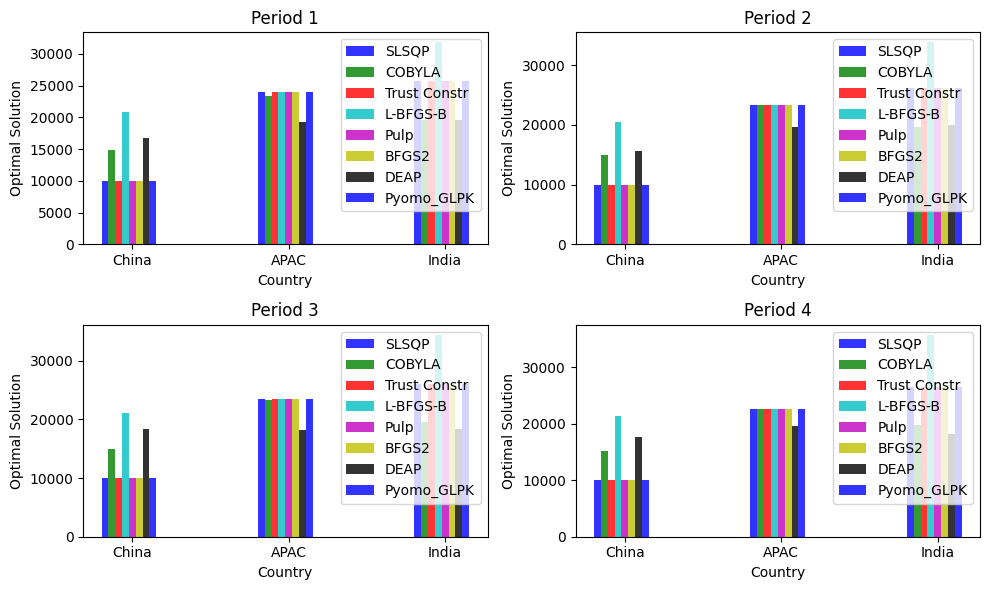

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    'L-BFGS-B':result_bfgs,
    "Pulp":pulp_result,
    'BFGS2':result_BFGS2,
    "DEAP": deap_result,
    "Pyomo_GLPK": pyomo_result
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)



### <a id='toc7_12_1_'></a>[5.11.1 Comparision SLSQP vs. GLPK](#toc0_)

Methodology:__

>  *    __SLSQP__: is a nonlinear optimization algorithm that can handle both equality and inequality constraints.
>  *   __GLPK__: LPK is a linear programming tool that can handle linear problems, including integer and mixed-integer linear programming problems.


__Performance:__

>  *   __GLPK__: is slightly faster on this problem on hand




## <a id='toc7_13_'></a>[5.12 Model 8 Minxed-Integer Programming: CBC (COIN-OR Brand and Cut)](#toc0_)

In [ ]:
solver = pyomo.opt.SolverFactory('cbc')
start_time = time.time()
result_cbc = solver.solve(model)
end_time = time.time()


# Calculate the time taken
time_taken = end_time - start_time


In [ ]:

# Extract and print the results
print("Optimal Solution:")
for t in range(num_periods):
    for i in range(num_products):
        print(f"Period {t}, Country {countries[i]}: {model.x[t,i].value}")

# Create a result object for Pyomo
result_cbc = type('', (), {})()  # create an empty object
result_cbc.x = [model.x[t,i].value for t in range(num_periods) for i in range(num_products)]  # assign the optimal solution to the x attribute
result_cbc.success = (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal)  # check if the solution is optimal

# Add the Pyomo result to the results dictionary
results_dict['Pyomo'] = result_cbc

# Print the time taken
print(f"Time taken for the algorithm to execute: {time_taken} seconds")

Optimal Solution:
Period 0, Country China: 10000.0
Period 0, Country APAC: 23986.0
Period 0, Country India: 25676.0
Period 1, Country China: 10000.0
Period 1, Country APAC: 23317.0
Period 1, Country India: 26122.0
Period 2, Country China: 10000.0
Period 2, Country APAC: 23431.0
Period 2, Country India: 26046.0
Period 3, Country China: 10000.0
Period 3, Country APAC: 22690.0
Period 3, Country India: 26540.0
Time taken for the algorithm to execute: 0.0741264820098877 seconds


In [ ]:
constraints_results(result_cbc, 'Pyomo_CBC')

------ Pyomo_CBC ------
Optimal objective value: 8069584.0
Capacity constraint value for period 1: 0.0
Forecast constraint for product in Country China in period 1: 10864.633000000002
Forecast constraint for product in Country APAC in period 1: 2.0020000000004075
Forecast constraint for product in Country India in period 1: 6139.950000000001
Capacity constraint value for period 2: 0.0
Forecast constraint for product in Country China in period 2: 10390.285
Forecast constraint for product in Country APAC in period 2: 1.481999999999971
Forecast constraint for product in Country India in period 2: 7672.769999999997
Capacity constraint value for period 3: 0.0
Forecast constraint for product in Country China in period 3: 11125.203000000001
Forecast constraint for product in Country APAC in period 3: 0.9279999999998836
Forecast constraint for product in Country India in period 3: 8333.605000000003
Capacity constraint value for period 4: 0.0
Forecast constraint for product in Country China in 

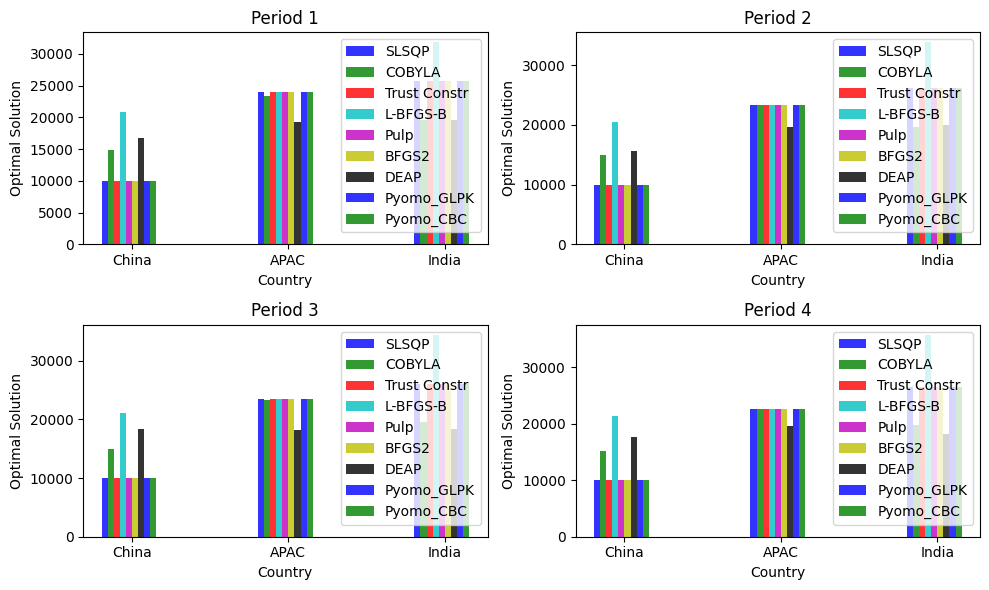

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    'L-BFGS-B':result_bfgs,
    "Pulp":pulp_result,
    'BFGS2':result_BFGS2,
    "DEAP": deap_result,
    "Pyomo_GLPK": pyomo_result,
    "Pyomo_CBC" : result_cbc
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

### <a id='toc7_13_1_'></a>[5.12.1 Comparision SLSQP vs. CBC](#toc0_)



__Methodology:__

>  *    __SLSQP__: is a nonlinear optimization algorithm that can handle both equality and inequality constraints.
>  *   __CBC__: LPK is a linear programming tool that can handle linear problems, including integer and mixed-integer linear programming problems.

__Performance__

>  *   __CBC__: extremly fast


## <a id='toc7_14_'></a>[5.13 Model : APOPT (Advanced Process Optimization/ Others- mixed integer nonlinear programming (MINLP)](#toc0_)

This is a Python library for machine learning and optimization, focused on time-series data. It can handle nonlinear programming problems

In [ ]:
pip install Gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.4 MB/s eta 0:00:00


In [ ]:
from gekko import GEKKO

# Create a model
m = GEKKO()

# Define decision variables
x = [[m.Var(lb=10000, integer=True) for _ in range(num_products)] for _ in range(num_periods)]

# Define objective function
m.Maximize(sum((sales_per_unit[i] - cost_per_unit[i]) * x[t][i] for t in range(num_periods) for i in range(num_products)))

# Define constraints
for t in range(num_periods):
    # Capacity constraint
    m.Equation(sum(weights[i] * x[t][i] for i in range(num_products)) <= 82500)

    # Forecast and minimum production constraints
    for i in range(num_products):
        m.Equation(x[t][i] <= forecasted_demand[t][i])

# Solve the problem
m.options.SOLVER = 1  # use APOPT solver
start_time = time.time()
m.solve(disp=False)
end_time = time.time()

# Extract and print the results
print("Optimal Solution:")
for t in range(num_periods):
    for i in range(num_products):
        print(f"Period {t}, Country {countries[i]}: {x[t][i].value[0]}")

# Create a result object for Gekko
gekko_result = type('', (), {})()  # create an empty object
gekko_result.x = [x[t][i].value[0] for t in range(num_periods) for i in range(num_products)]  # assign the optimal solution to the x attribute
gekko_result.success = m.options.APPINFO == 1  # check if the solution is optimal

# Add the Gekko result to the results dictionary
results_dict['Gekko'] = gekko_result

print(f"Time taken for the algorithm to execute: {end_time - start_time} seconds")



Optimal Solution:
Period 0, Country China: 10000.0
Period 0, Country APAC: 23987.0
Period 0, Country India: 25675.0
Period 1, Country China: 10000.0
Period 1, Country APAC: 23318.0
Period 1, Country India: 26121.0
Period 2, Country China: 10000.0
Period 2, Country APAC: 23431.0
Period 2, Country India: 26046.0
Period 3, Country China: 10000.0
Period 3, Country APAC: 22690.0
Period 3, Country India: 26540.0
Time taken for the algorithm to execute: 4.214341163635254 seconds


In [ ]:
constraints_results(gekko_result, 'Gekko-APOPT')

------ Gekko-APOPT ------
Optimal objective value: 8069576.0
Capacity constraint value for period 1: 0.5
Forecast constraint for product in Country China in period 1: 10864.633000000002
Forecast constraint for product in Country APAC in period 1: 1.0020000000004075
Forecast constraint for product in Country India in period 1: 6140.950000000001
Capacity constraint value for period 2: 0.5
Forecast constraint for product in Country China in period 2: 10390.285
Forecast constraint for product in Country APAC in period 2: 0.4819999999999709
Forecast constraint for product in Country India in period 2: 7673.769999999997
Capacity constraint value for period 3: 0.0
Forecast constraint for product in Country China in period 3: 11125.203000000001
Forecast constraint for product in Country APAC in period 3: 0.9279999999998836
Forecast constraint for product in Country India in period 3: 8333.605000000003
Capacity constraint value for period 4: 0.0
Forecast constraint for product in Country China 

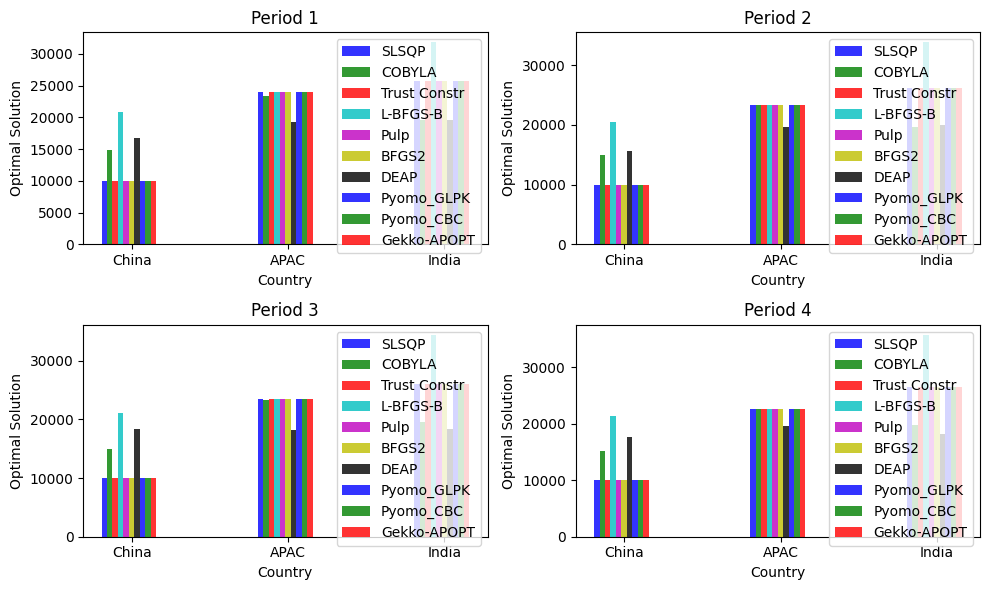

In [ ]:
results_dict = {
    "SLSQP": result_slsqp,
    "COBYLA": result_cobyla,
    "Trust Constr": result_trust_constr,
    'L-BFGS-B':result_bfgs,
    "Pulp":pulp_result,
    'BFGS2':result_BFGS2,
    "DEAP": deap_result,
    "Pyomo_GLPK": pyomo_result,
    "Pyomo_CBC" : result_cbc,
    "Gekko-APOPT":gekko_result
    # Add more algorithms here
}

compare_algorithms(results_dict, num_periods, num_products)

Gekko takes quite long to find the optimal solution

SLSQP, Trust-Constraint, L-BFGS-B (SciPy): Gradient-based solvers for smooth, differentiable problems. Gekko with APOPT can handle mixed-integer and nonlinear problems without needing derivatives.

COBYLA (SciPy): Derivative-free method for constrained problems. Gekko with APOPT also handles constrained problems and supports mixed-integer programming.

Pulp: Handles linear and mixed-integer linear programming. Gekko with APOPT also supports these, plus nonlinear problems.

Pyomo with GLPK/CBC: Handles linear and mixed-integer programming. Gekko with APOPT also supports these, plus nonlinear problems, and aims for global optimum.

DEAP: Population-based method for genetic algorithms. Gekko with APOPT is a deterministic solver for mixed-integer and nonlinear problems.

# <a id='toc8_'></a>[6. Comparision Optimization](#toc0_)

In [ ]:
algorithms = [
    "SLSQP", "COBYLA", "Trust Constr", "Pulp_CBC",
    "L-BFGS-B", "BFGS2", "DEAP", "Pyomo_GLPK", "Pyomo_CBC", "Gekko-APOPT"
]

optimal_objective_values = [
    8069624, 7892007, 8069624, 8069584,
    10831547, 8069624, 7635994,8069584, 8069584, 8069576
]

capacity_constraint_values_period_1 = [
    -3.7834979593753815e-10, -1.4551915228366852e-11, 0.00017170447972603142, 0.0,
    -30941.193000000014, -0.00011661142343655229, 448.0, 0.0, 0.0, 0.0
]

capacity_constraint_values_period_2 = [
    -3.637978807091713e-10, 0.0, 0.00017170468345284462, 0.0,
    -32291.206999999995,-0.00011667655780911446, 1579, 0.0, 0.0, 0.0
]

capacity_constraint_values_period_3 = [
    -3.7834979593753815e-10, 2.9103830456733704e-11, 0.00017170459614135325, 0.0,
    -34751.741500000004, -0.00011674223060254008, 131.5, 0.0, 0.0, 0.0
]

capacity_constraint_values_period_4 = [
    -3.637978807091713e-10, -2.9103830456733704e-11,0.00017170494538731873, 0.0,
    -36656.738, -0.00011657793947961181, 405., 0.0, 0.0, 0.0
]


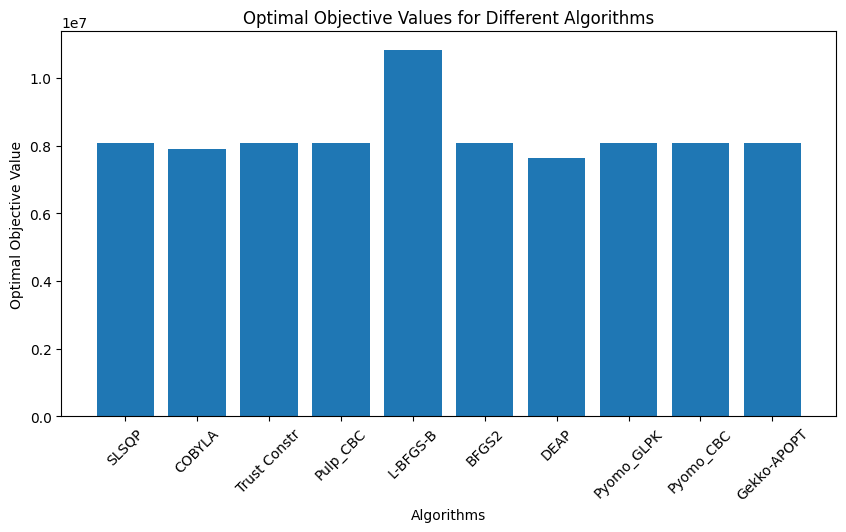

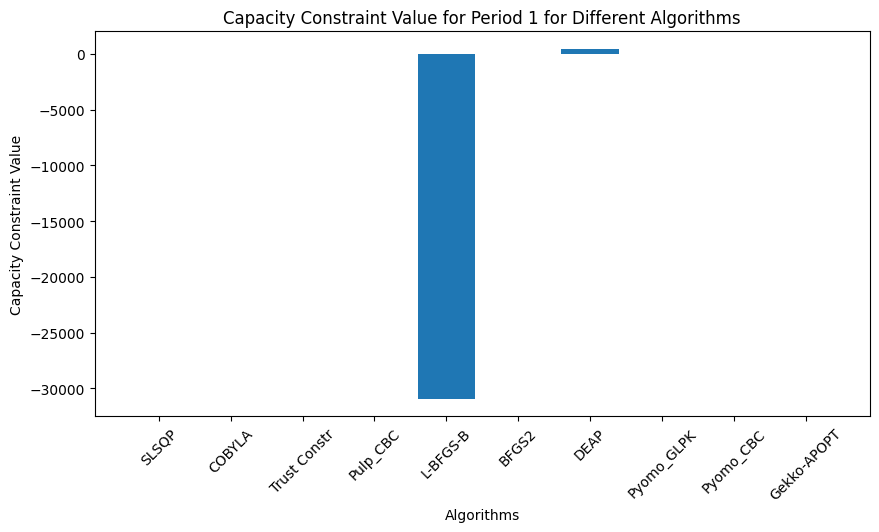

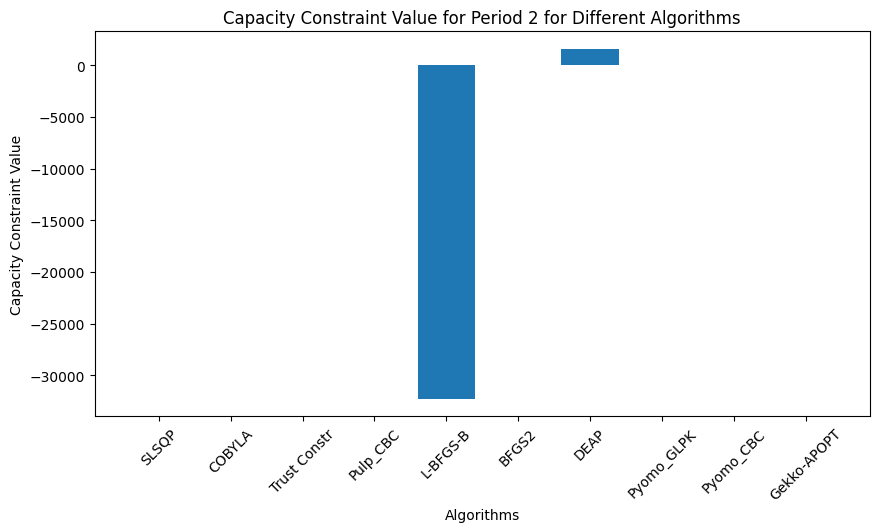

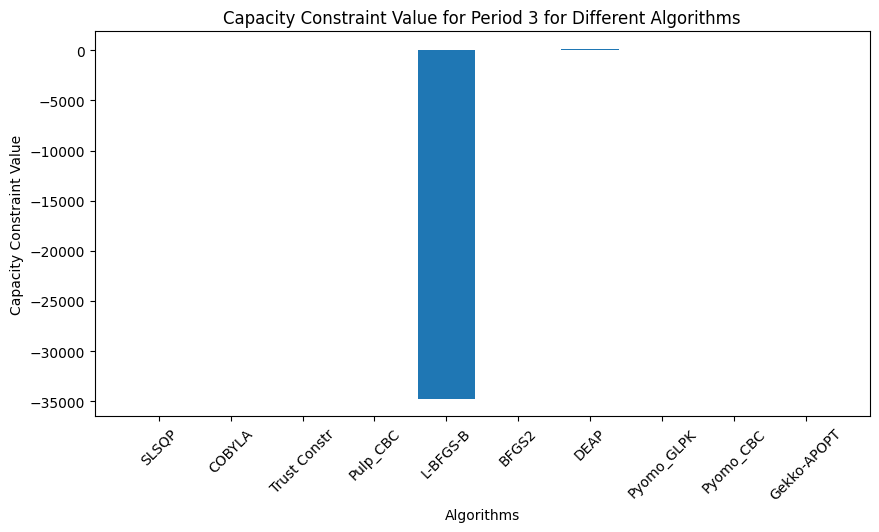

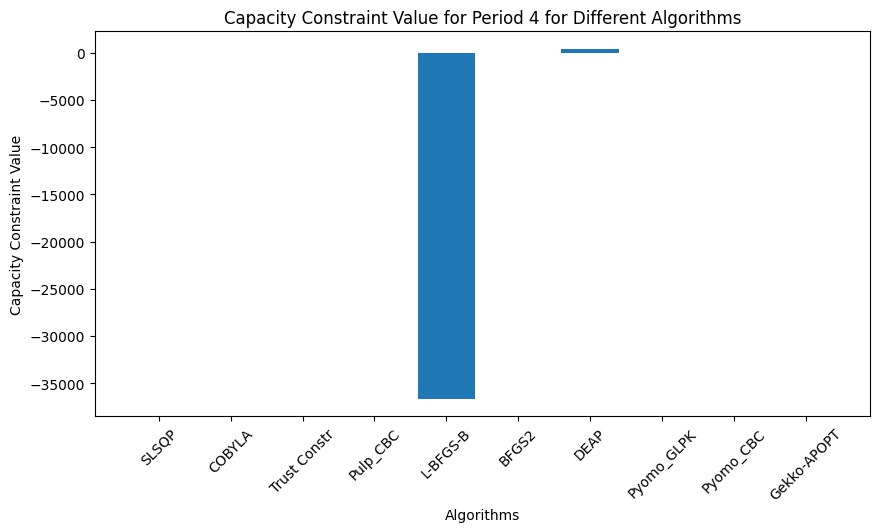

In [ ]:
# First bar plot (Optimal Objective Values)
plt.figure(figsize=(10, 5))
plt.bar(algorithms, optimal_objective_values)
plt.xlabel("Algorithms")
plt.ylabel("Optimal Objective Value")
plt.title("Optimal Objective Values for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Second bar plot (Capacity Constraint Values for Period 1)
plt.figure(figsize=(10, 5))
plt.bar(algorithms, capacity_constraint_values_period_1)
plt.xlabel("Algorithms")
plt.ylabel("Capacity Constraint Value")
plt.title("Capacity Constraint Value for Period 1 for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Second bar plot (Capacity Constraint Values for Period 2)
plt.figure(figsize=(10, 5))
plt.bar(algorithms, capacity_constraint_values_period_2)
plt.xlabel("Algorithms")
plt.ylabel("Capacity Constraint Value")
plt.title("Capacity Constraint Value for Period 2 for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

# Second bar plot (Capacity Constraint Values for Period 3)
plt.figure(figsize=(10, 5))
plt.bar(algorithms, capacity_constraint_values_period_3)
plt.xlabel("Algorithms")
plt.ylabel("Capacity Constraint Value")
plt.title("Capacity Constraint Value for Period 3 for Different Algorithms")
plt.xticks(rotation=45)
plt.show()


# Second bar plot (Capacity Constraint Values for Period 4)
plt.figure(figsize=(10, 5))
plt.bar(algorithms, capacity_constraint_values_period_4)
plt.xlabel("Algorithms")
plt.ylabel("Capacity Constraint Value")
plt.title("Capacity Constraint Value for Period 4 for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

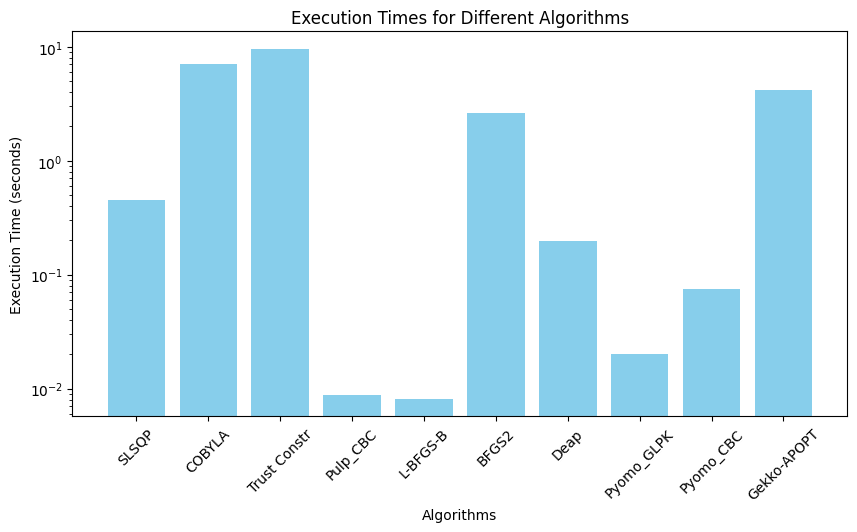

In [ ]:
# Algorithms and execution times data
algorithms = [
    "SLSQP", "COBYLA", "Trust Constr", "Pulp_CBC",
    "L-BFGS-B", "BFGS2", "Deap", "Pyomo_GLPK", "Pyomo_CBC", "Gekko-APOPT"
]

execution_times = [
    0.45096611976623535 , 7.028325319290161, 9.603099584579468  , 0.008766889572143555 ,
    0.008126258850097656, 2.62229585647583,0.1988 , 0.020082712173461914,
     0.0741264820098877 , 4.214341163635254
]

# Create bar plot for execution times
plt.figure(figsize=(10, 5))
plt.bar(algorithms, execution_times, color='skyblue')
plt.xlabel("Algorithms")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Algorithms")
plt.xticks(rotation=45)
plt.yscale("log")  # Use log scale for better visualization
plt.show()


# <a id='toc9_'></a>[7. Recommendation](#toc0_)

**High recommendation**  ✅
 *   **Pulp_CBC**: For the problem at hand and the complexity we used Pulp-CBC seems to be the best solution


 **Medium recommendation**:✊
*   **Pyomo_GLPK, Pyomo_CBC, Gekko-APOPT**: are slower in terms of time performance


**No recommendation**❌
 *   **L-BFGS-B** : not respecting capacity constraints, alternative we used **BFGS2** but we had to include penalities, so also not recommeneded algorithm
 *    **Deap** are do not use the capacity to their full potential
 *   **SLSQP, Trust Constr and COBYLA** do not provide integer solutions and are not realistic for real unit production

# <a id='toc10_'></a>[8. Limitations and Complexities in Supply Chain Optimization for Diabetes care](#toc0_)



 1. **Production Constraints**🏭
- Limited manufacturing capacity and varying production lead times.
- The need to balance between economies of scale and responsiveness to market demand.
- Balance short term and long term trade-off, invest in new technology or sell more short term
P
 2 **Demand Variability**📈
- Unpredictable changes in demand due to market trends, policy changes, or health emergencies.
- Difficulty in estimating demand for new products or in emerging markets.

3. **Profit Optimization Challenges**💰
- Balancing production costs, pricing, and demand to maximize profit.
- Fluctuating international shipping costs, tariffs, and currency exchange rates.

4. **Supply Chain Disruptions**⚡
- Disruptions due to natural disasters, geopolitical tensions, or supplier unreliability.
- Difficulty in establishing alternate supply sources quickly.

5. **Regulatory Compliance**📜
- Varying and frequently changing regulations across APAC countries.
- Costs and time associated with ensuring product compliance.

6. **Inventory Costs**📦
- Costs associated with overstocking, such as warehousing and obsolescence.
- Lost sales and customer dissatisfaction due to stockouts.

7. **Minimum Order Quantities (MOQ)**📋
- MOQ constraints from suppliers can lead to overstocking.
- Difficulty in managing MOQ for a diverse product range.

 8. **Forecasting Accuracy**📊
- Inherent inaccuracies in forecasting models based on historical data.
- Sensitivity of models like ARIMA and LSTM to parameter tuning and data quality.

9. **Multi-echelon Inventory Management**🔄
- Managing inventory at different stages of the supply chain (e.g., manufacturer, distributor, retailer).
- Complexity in coordinating inventory policies across echelons to avoid bullwhip effect.

 10.  **Distribution Network Design**🌐
- Deciding on the number and location of distribution centers for efficient fulfilment.
- Managing cross-border logistics and varying service levels across different markets.


